In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time
import math
import copy
import sklearn
from collections import OrderedDict

from pylab import mpl
from scipy.stats.mstats import winsorize
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import naive_bayes
# from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingClassifier
import shap
from sklearn.model_selection import cross_val_predict

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("Identification of potential customers for 5G packages.csv")
df.head()

user_id   product_no  gender  age  user_level  tenure_in_years  \
0  2.690000e+12  26231702691  female   46         3.0                5   
1  2.700000e+12  27358921188    male   53         2.0                1   
2  2.700000e+12  25912868422  female   30         2.0                1   
3  2.690000e+12  25988134864    male   41         3.0                1   
4  2.700000e+12  27958259375  female   31         3.0                1   

       segment  this_month_arpu  last_month_arpu  the_month_before_last_arpu  \
0  normal user            69.30            69.00                       69.00   
1   rural user            19.20            13.64                       12.24   
2  campus user            33.94            24.00                       18.00   
3  normal user            16.96            16.20                       16.20   
4  normal user            48.40            48.00                       48.20   

   this_month_dou  last_month_dou  the_month_before_last_dou  this_month_mou  \
0         5650.91         4233.87                    3579.13           281.0   
1            0.02            0.02                       0.02           250.0   
2         2345.84          599.83                    1259.24            68.0   
3            0.00         3910.92                       0.00            21.0   
4         1579.82         2773.49                    3380.42            66.0   

   last_month_mou  the_month_before_last_mou  \
0           297.0                      576.0   
1           198.0                      370.0   
2           113.0                      104.0   
3            18.0                       50.0   
4           179.0                      145.0   

   average_arpu_in_the_past_three_months  \
0                                  69.10   
1                                  15.03   
2                                  25.31   
3                                  16.45   
4                                  48.20   

   average_dou_in_the_past_three_months  average_mou_in_the_past_three_months  \
0                               4487.97                                384.67   
1                                  0.02                                272.67   
2                               1401.64                                 95.00   
3                               1303.64                                 29.67   
4                               2577.91                                130.00   

   excess_call_amount_for_this_month  excess_call_amount_for_last_month  \
0                               0.00                               0.00   
1                              13.20                               7.64   
2                               0.00                               0.00   
3                               0.76                               0.00   
4                               0.00                               0.00   

   excess_call_amount_for_the_month_before_last  \
0                                          0.00   
1                                          6.24   
2                                          0.00   
3                                          0.00   
4                                          0.00   

   excess_dataflow_amount_for_this_month  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   excess_dataflow_amount_for_last_month  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   excess_dataflow_amount_for_the_month_before_last  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140000 entries, 0 to 139999
Data columns (total 46 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   user_id                                              140000 non-null  float64
 1   product_no                                           140000 non-null  int64  
 2   gender                                               140000 non-null  object 
 3   age                                                  140000 non-null  int64  
 4   user_level                                           133151 non-null  float64
 5   tenure_in_years                                      140000 non-null  int64  
 6   segment                                              139309 non-null  object 
 7   this_month_arpu                                      139911 non-null  float64
 8   last_month_arpu                                      1

## Data processing

In [4]:
# Convert categorical columns

categorical_columns = [
    'gender', 'user_level', 'segment', 'is_broadband_user_of_this_network', 'is_broadband_user_of_another_network',
    'is_broadband_activated', 'is_broadband_contract_bundled', 'is_terminal_contract_bundled',
    'is_credit_contracted', 'is_package_contracted', 'is_home_user', 'terminal_type',
    'is_low-consumption_number_retention_user_this_month', 'is_number_changed_this_month',
    'is_5G_covered_in_residence', 'is_5G_covered_in_workplace', 'label'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

df.dtypes

user_id                                                 float64
product_no                                                int64
gender                                                 category
age                                                       int64
user_level                                             category
tenure_in_years                                           int64
segment                                                category
this_month_arpu                                         float64
last_month_arpu                                         float64
the_month_before_last_arpu                              float64
this_month_dou                                          float64
last_month_dou                                          float64
the_month_before_last_dou                               float64
this_month_mou                                          float64
last_month_mou                                          float64
the_month_before_last_mou               

In [5]:
df.isna().sum()

user_id                                                     0
product_no                                                  0
gender                                                      0
age                                                         0
user_level                                               6849
tenure_in_years                                             0
segment                                                   691
this_month_arpu                                            89
last_month_arpu                                            89
the_month_before_last_arpu                                 89
this_month_dou                                             89
last_month_dou                                             89
the_month_before_last_dou                                  89
this_month_mou                                             89
last_month_mou                                             89
the_month_before_last_mou                                  89
average_

user_level
3.0    76459
4.0    25764
2.0    17067
1.0    10752
0.0     2985
5.0      101
6.0       19
7.0        4
Name: count, dtype: int64
segment
normal user       70076
rural user        38742
corporate user    21705
campus user        8786
Name: count, dtype: int64


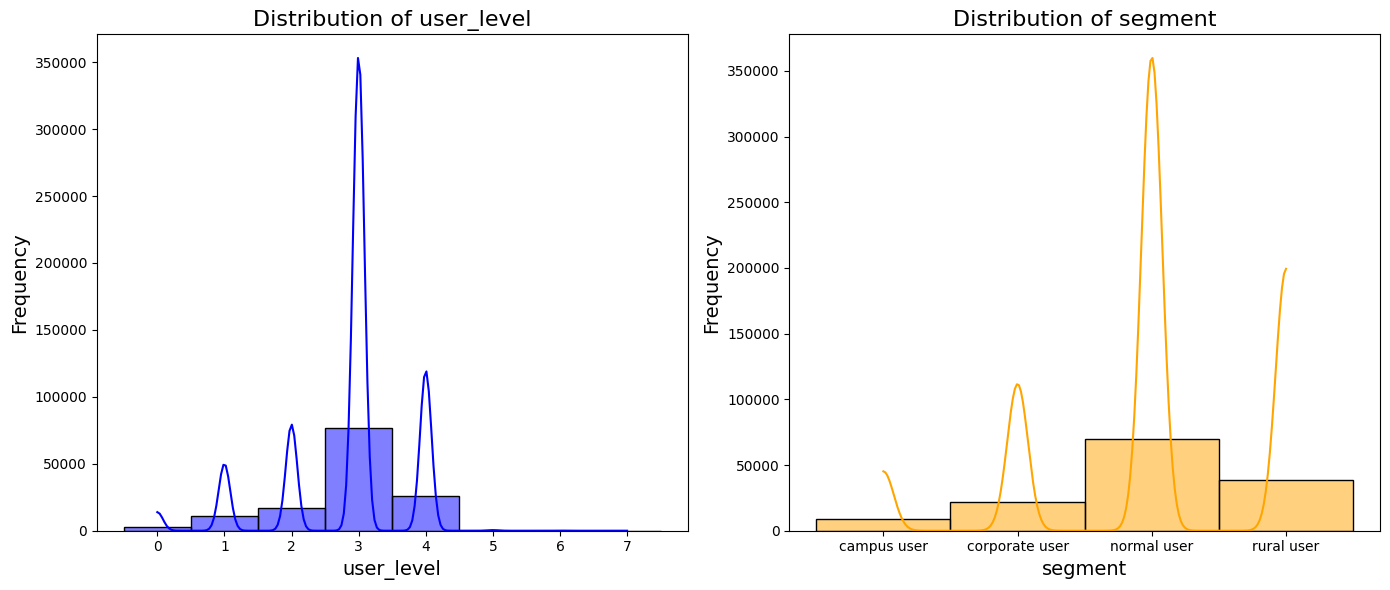

In [6]:
# NAs in "user_level" and "segment"

print(df['user_level'].value_counts())
print(df['segment'].value_counts())

# Distribution charts of user_level and segment
fig, axs = plt.subplots(1, 2, figsize = (14, 6))

# Plot for user_level
sns.histplot(df['user_level'], bins = 30, kde = True, color = 'blue', ax = axs[0])
axs[0].set_title('Distribution of user_level', fontsize = 16)
axs[0].set_xlabel('user_level', fontsize = 14)
axs[0].set_ylabel('Frequency', fontsize = 14)

# Plot for segment
sns.histplot(df['segment'], bins = 30, kde = True, color = 'orange', ax = axs[1])
axs[1].set_title('Distribution of segment', fontsize = 16)
axs[1].set_xlabel('segment', fontsize = 14)
axs[1].set_ylabel('Frequency', fontsize = 14)

plt.tight_layout()
plt.show()

# Fill NAs in "user_level" and "segment" with the modes
df['user_level'].fillna(df['user_level'].mode()[0], inplace = True)
df['segment'].fillna(df['segment'].mode()[0], inplace = True)

In [7]:
# Drop the rows that have NAs in multiple columns

rows_to_drop = [
    'this_month_arpu', 'last_month_arpu', 'the_month_before_last_arpu',
    'this_month_dou', 'last_month_dou', 'the_month_before_last_dou',
    'this_month_mou', 'last_month_mou', 'the_month_before_last_mou',
    'average_arpu_in_the_past_three_months', 'average_dou_in_the_past_three_months', 'average_mou_in_the_past_three_months',
    'excess_call_amount_for_this_month', 'excess_call_amount_for_last_month', 'excess_call_amount_for_the_month_before_last',
    'excess_dataflow_amount_for_this_month', 'excess_dataflow_amount_for_last_month', 'excess_dataflow_amount_for_the_month_before_last'
]

df.dropna(subset = rows_to_drop, inplace = True)

# Reset the index
df.reset_index(drop = True, inplace = True)

In [8]:
# Replace NAs in "broadband_bandwidth" and "is_broadband_activated" with 0
df['broadband_bandwidth'].fillna(0, inplace = True)  ##

df['is_broadband_activated'] = df['is_broadband_activated'].cat.add_categories([0])
df['is_broadband_activated'].fillna(0, inplace = True)


# Drop the rows that have NAs in multiple columns
df.dropna(subset = ['is_broadband_contract_bundled', 'is_terminal_contract_bundled',
                    'is_credit_contracted', 'is_package_contracted'], inplace = True)


# Fill NAs in "total_package_fee" and "main_package_fee" with the medians
# print(df['total_package_fee'].describe())
# print(df['main_package_fee'].describe())

df['total_package_fee'].fillna(df['total_package_fee'].median(), inplace = True)
df['main_package_fee'].fillna(df['main_package_fee'].median(), inplace = True)


# Fill NAs in "excess_dataflow_usage_for_this_month", "excess_dataflow_usage_for_last_month" and "excess_dataflow_usage_for_the_month_before_last" with the medians
df['excess_dataflow_usage_for_this_month'].fillna(df['excess_dataflow_usage_for_this_month'].median(), inplace = True)
df['excess_dataflow_usage_for_last_month'].fillna(df['excess_dataflow_usage_for_last_month'].median(), inplace = True)
df['excess_dataflow_usage_for_the_month_before_last'].fillna(df['excess_dataflow_usage_for_the_month_before_last'].median(), inplace = True)


# Replace NAs in "5G_dataflow_usage" with 0
df['5G_dataflow_usage'].fillna(0, inplace = True)

df.isna().sum()

user_id                                                0
product_no                                             0
gender                                                 0
age                                                    0
user_level                                             0
tenure_in_years                                        0
segment                                                0
this_month_arpu                                        0
last_month_arpu                                        0
the_month_before_last_arpu                             0
this_month_dou                                         0
last_month_dou                                         0
the_month_before_last_dou                              0
this_month_mou                                         0
last_month_mou                                         0
the_month_before_last_mou                              0
average_arpu_in_the_past_three_months                  0
average_dou_in_the_past_three_m

# LIMEY

In [9]:
df = df.drop(columns=['user_id','product_no'])

1. Find correlation --> detect multicollinearity -> arpu, dou, mou --> we drop these
2. Descriptive graphs to identify target customer segmentation (

In [10]:
df_dummies = pd.get_dummies(df)

In [11]:
df_dummies.head()

age  tenure_in_years  this_month_arpu  last_month_arpu  \
0   46                5            69.30            69.00   
1   53                1            19.20            13.64   
2   30                1            33.94            24.00   
3   41                1            16.96            16.20   
4   31                1            48.40            48.00   

   the_month_before_last_arpu  this_month_dou  last_month_dou  \
0                       69.00         5650.91         4233.87   
1                       12.24            0.02            0.02   
2                       18.00         2345.84          599.83   
3                       16.20            0.00         3910.92   
4                       48.20         1579.82         2773.49   

   the_month_before_last_dou  this_month_mou  last_month_mou  \
0                    3579.13           281.0           297.0   
1                       0.02           250.0           198.0   
2                    1259.24            68.0           113.0   
3                       0.00            21.0            18.0   
4                    3380.42            66.0           179.0   

   the_month_before_last_mou  average_arpu_in_the_past_three_months  \
0                      576.0                                  69.10   
1                      370.0                                  15.03   
2                      104.0                                  25.31   
3                       50.0                                  16.45   
4                      145.0                                  48.20   

   average_dou_in_the_past_three_months  average_mou_in_the_past_three_months  \
0                               4487.97                                384.67   
1                                  0.02                                272.67   
2                               1401.64                                 95.00   
3                               1303.64                                 29.67   
4                               2577.91                                130.00   

   excess_call_amount_for_this_month  excess_call_amount_for_last_month  \
0                               0.00                               0.00   
1                              13.20                               7.64   
2                               0.00                               0.00   
3                               0.76                               0.00   
4                               0.00                               0.00   

   excess_call_amount_for_the_month_before_last  \
0                                          0.00   
1                                          6.24   
2                                          0.00   
3                                          0.00   
4                                          0.00   

   excess_dataflow_amount_for_this_month  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   excess_dataflow_amount_for_last_month  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   excess_dataflow_amount_for_the_month_before_last  broadband_bandwidth  \
0                                               0.0                100.0   
1                                               0.0                  0.0   
2                                               0.0                  0.0   
3                                               0.0                  0.0   
4                                               0.0                 60.0   

   total_package_fee  main_package_fee  excess_dataflow_usage_for_this_month  \
0               68.0              68.0                                   0.0   
1               28.0              28.0   

In [12]:
to_drop = ['gender_male', 'is_broadband_user_of_this_network_0', 'is_broadband_user_of_another_network_0',
           'is_broadband_contract_bundled_0.0', 
          'is_terminal_contract_bundled_0.0', 'is_credit_contracted_0.0', 'is_package_contracted_0.0',
          'is_home_user_0', 'is_low-consumption_number_retention_user_this_month_0', 
          'is_number_changed_this_month_0', 'is_5G_covered_in_residence_0', 'is_5G_covered_in_workplace_0',
          'label_0']
df_dummies.drop(to_drop, axis=1, inplace=True)

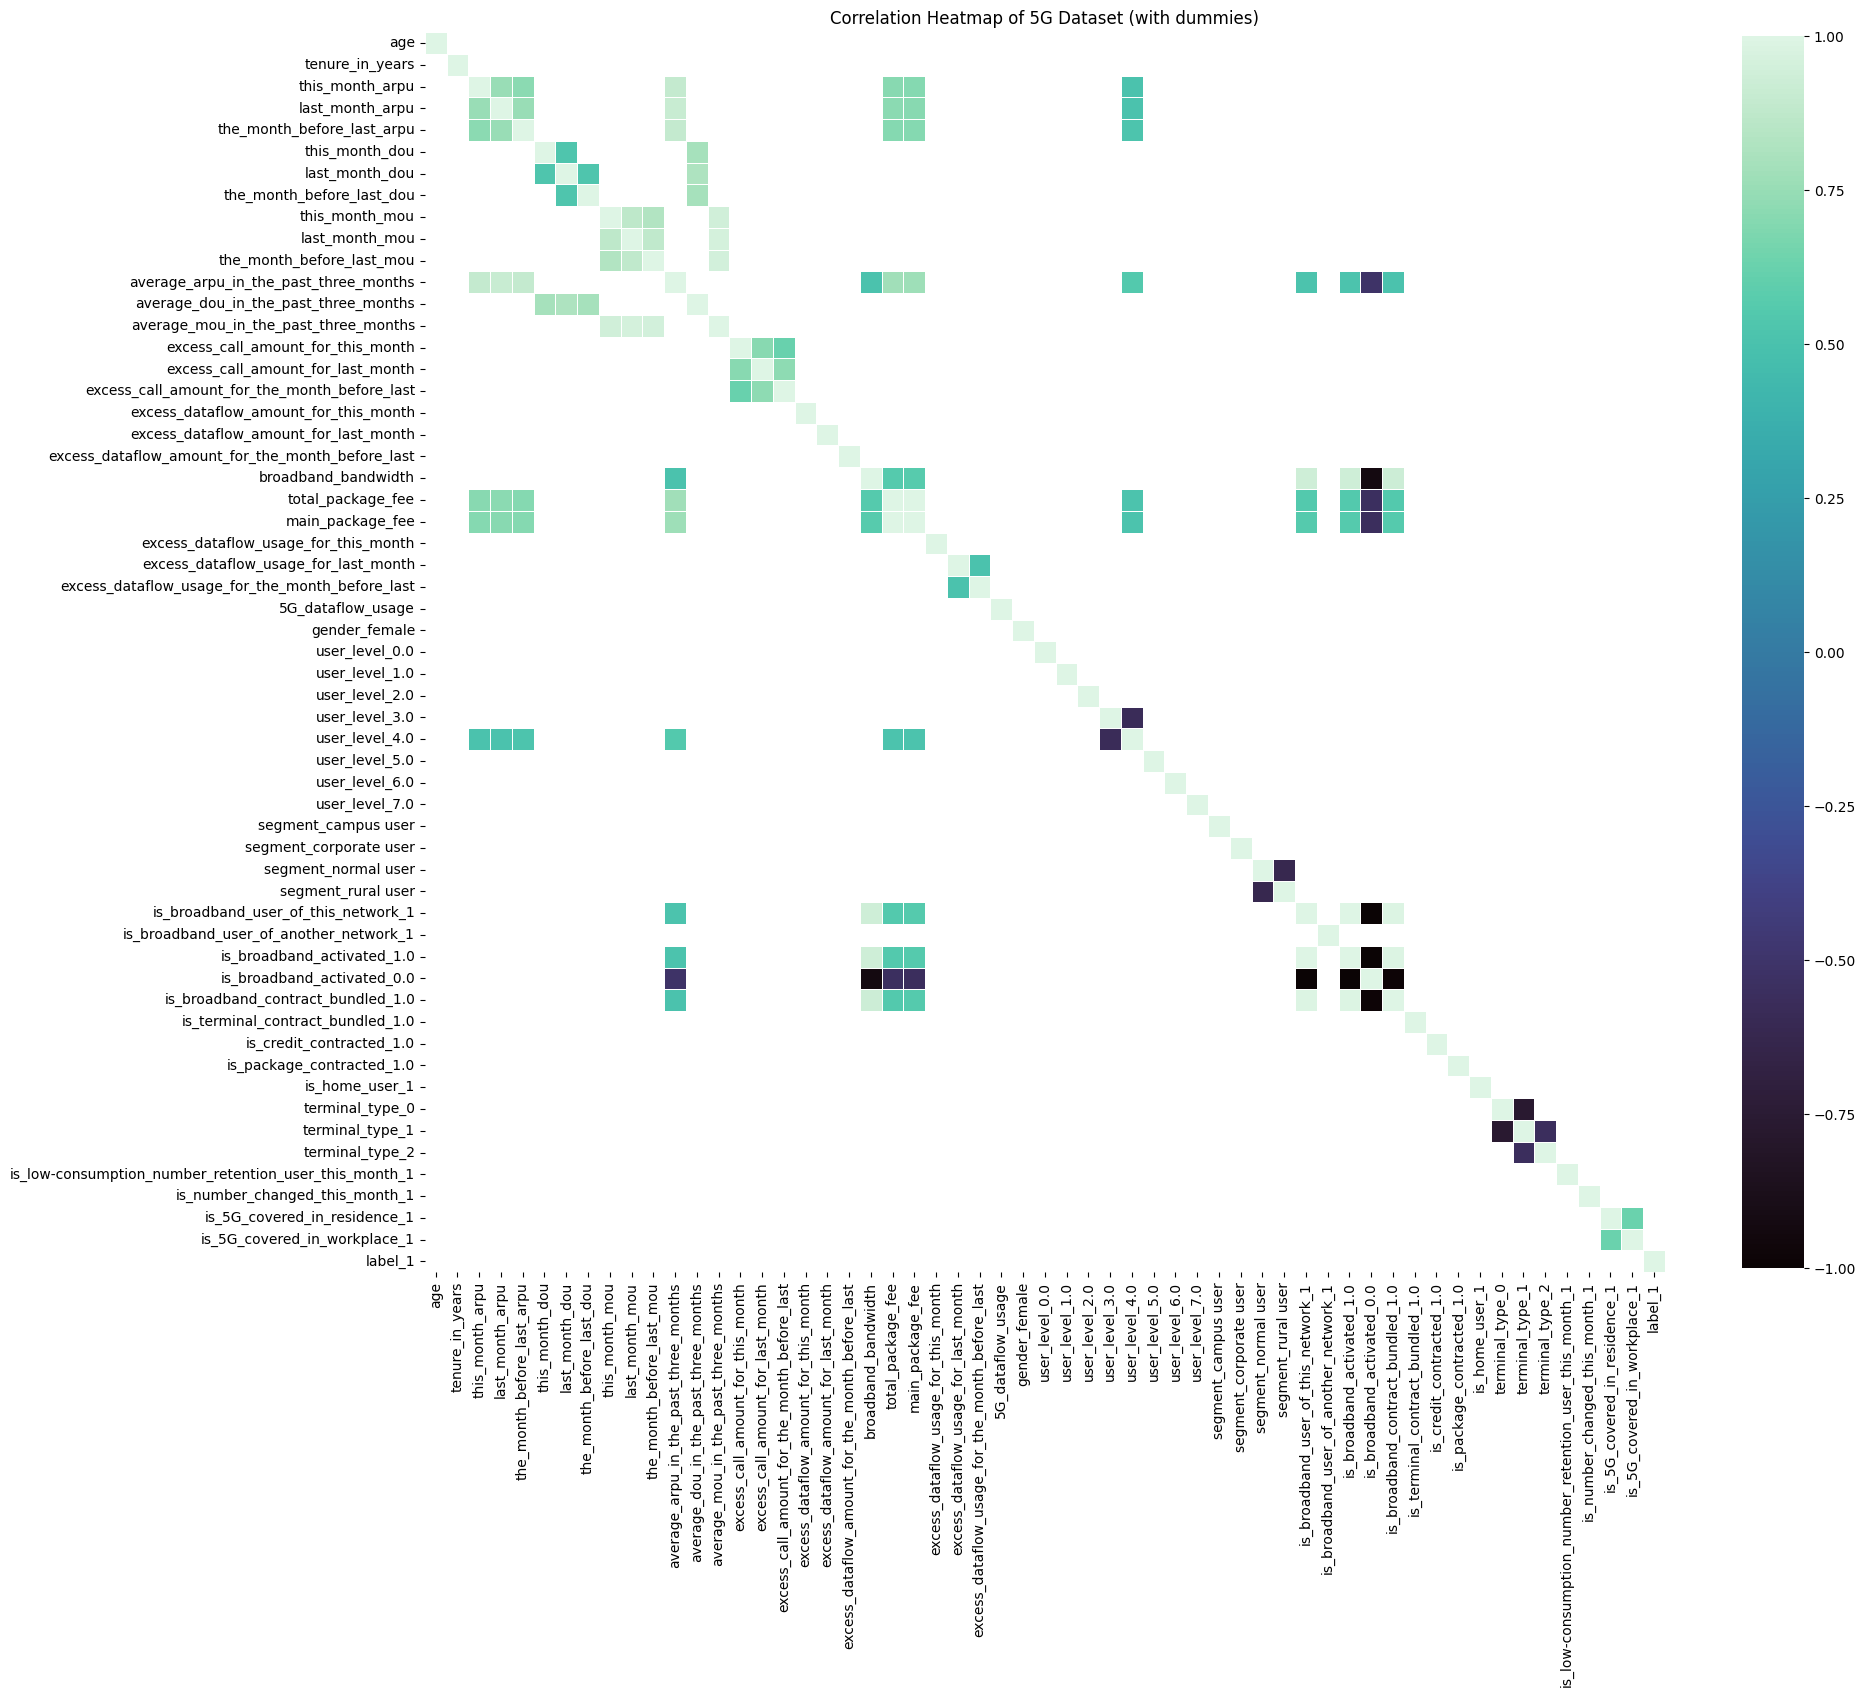

In [13]:
correlation_matrix2 = df_dummies.corr()
mask = correlation_matrix2.abs() > 0.5
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix2, mask=~mask, cmap='mako', square=True, cbar_kws={"shrink": .8}, linewidths=.5)          

plt.title('Correlation Heatmap of 5G Dataset (with dummies)')
plt.show()


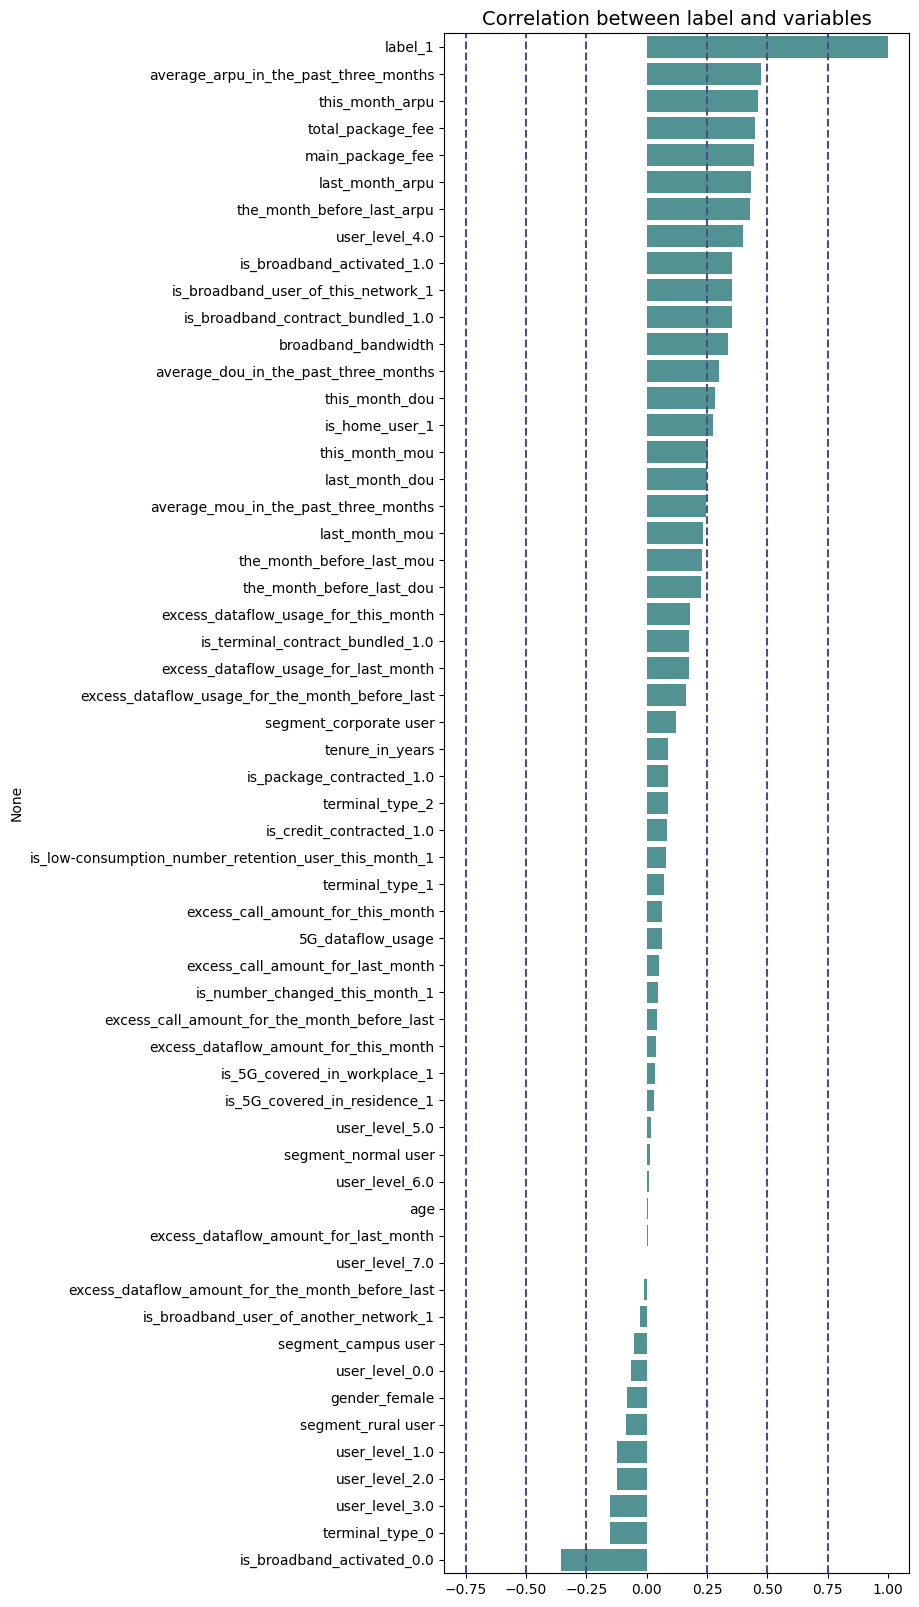

In [14]:
plt.figure(figsize=(6,20))
x = df_dummies.corr()['label_1'].sort_values(ascending=False)
sns.barplot(y = x.index, x = x.values, orient = 'h', color='#479C9E')
plt.axvline(x=0.25, linestyle="--", color="#495084")
plt.axvline(x=0.5, linestyle="--", color="#495084")
plt.axvline(x=0.75, linestyle="--", color="#495084")
plt.axvline(x=-0.25, linestyle="--", color="#495084")
plt.axvline(x=-0.5, linestyle="--", color="#495084")
plt.axvline(x=-0.75, linestyle="--", color="#495084")
plt.title('Correlation between label and variables', fontsize=14)
plt.show()

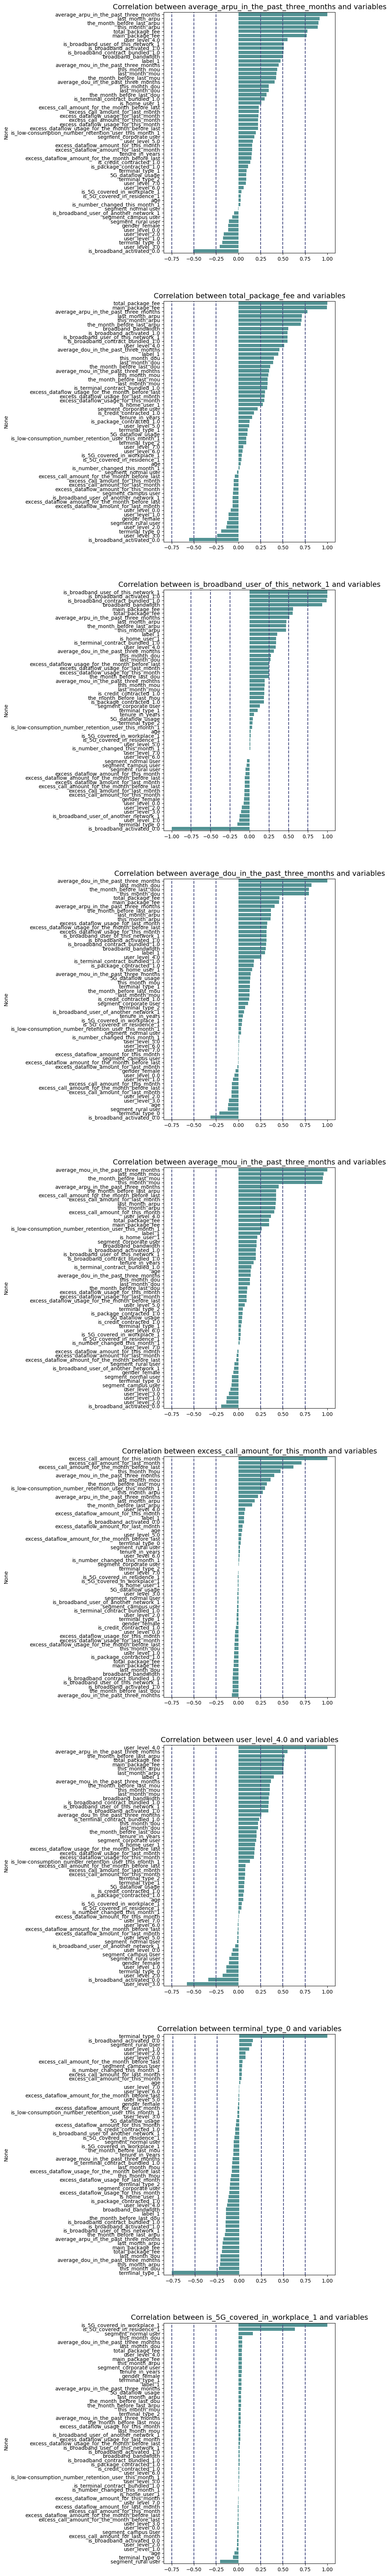

In [15]:
corr_columns = ['average_arpu_in_the_past_three_months', 'total_package_fee', 
                'is_broadband_user_of_this_network_1', 'average_dou_in_the_past_three_months',
               'average_mou_in_the_past_three_months', 'excess_call_amount_for_this_month',
               'user_level_4.0', 'terminal_type_0', 'is_5G_covered_in_workplace_1']

num = len(corr_columns)
fig, axes = plt.subplots(nrows=num, ncols=1, figsize=(6, 10*num))

for ax, col in zip(axes, corr_columns):
    x = df_dummies.corr()[col].sort_values(ascending=False)
    sns.barplot(y=x.index, x=x.values, ax=ax, color='#479C9E')

    ax.axvline(x=0.25, linestyle="--", color="#495084")
    ax.axvline(x=0.5, linestyle="--", color="#495084")
    ax.axvline(x=0.75, linestyle="--", color="#495084")
    ax.axvline(x=-0.25, linestyle="--", color="#495084")
    ax.axvline(x=-0.5, linestyle="--", color="#495084")
    ax.axvline(x=-0.75, linestyle="--", color="#495084")
    ax.set_title(f'Correlation between {col} and variables', fontsize=14)

plt.show()

In [16]:
multi_drop = ['this_month_arpu', 'last_month_arpu','the_month_before_last_arpu',
             'total_package_fee', 'main_package_fee', 'is_broadband_activated_1.0',
             'is_broadband_contract_bundled_1.0', 'this_month_dou', 'last_month_dou',
             'the_month_before_last_dou', 'this_month_mou', 'last_month_mou',
             'the_month_before_last_mou', 'is_broadband_user_of_this_network_1']

df_dummies.drop(multi_drop, axis=1, inplace=True)
df_dummies.head()

age  tenure_in_years  average_arpu_in_the_past_three_months  \
0   46                5                                  69.10   
1   53                1                                  15.03   
2   30                1                                  25.31   
3   41                1                                  16.45   
4   31                1                                  48.20   

   average_dou_in_the_past_three_months  average_mou_in_the_past_three_months  \
0                               4487.97                                384.67   
1                                  0.02                                272.67   
2                               1401.64                                 95.00   
3                               1303.64                                 29.67   
4                               2577.91                                130.00   

   excess_call_amount_for_this_month  excess_call_amount_for_last_month  \
0                               0.00                               0.00   
1                              13.20                               7.64   
2                               0.00                               0.00   
3                               0.76                               0.00   
4                               0.00                               0.00   

   excess_call_amount_for_the_month_before_last  \
0                                          0.00   
1                                          6.24   
2                                          0.00   
3                                          0.00   
4                                          0.00   

   excess_dataflow_amount_for_this_month  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   excess_dataflow_amount_for_last_month  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   excess_dataflow_amount_for_the_month_before_last  broadband_bandwidth  \
0                                               0.0                100.0   
1                                               0.0                  0.0   
2                                               0.0                  0.0   
3                                               0.0                  0.0   
4                                               0.0                 60.0   

   excess_dataflow_usage_for_this_month  excess_dataflow_usage_for_last_month  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   excess_dataflow_usage_for_the_month_before_last  5G_dataflow_usage  \
0                                              0.0                0.0   
1                                              0.0                0.0   
2                                              0.0                0.0   
3                                              0.0                0.0   
4                                              0.0                0.0   

   gender_female  user_level_0.0  user_level_1.0  user_level_2.0  \
0           True           False           False           False   
1          False           False           False            True   
2           True           False           False            True   
3          False           False           False           False   
4           True           False           False           False   

   user_level_3.0  user_level_4.0  user

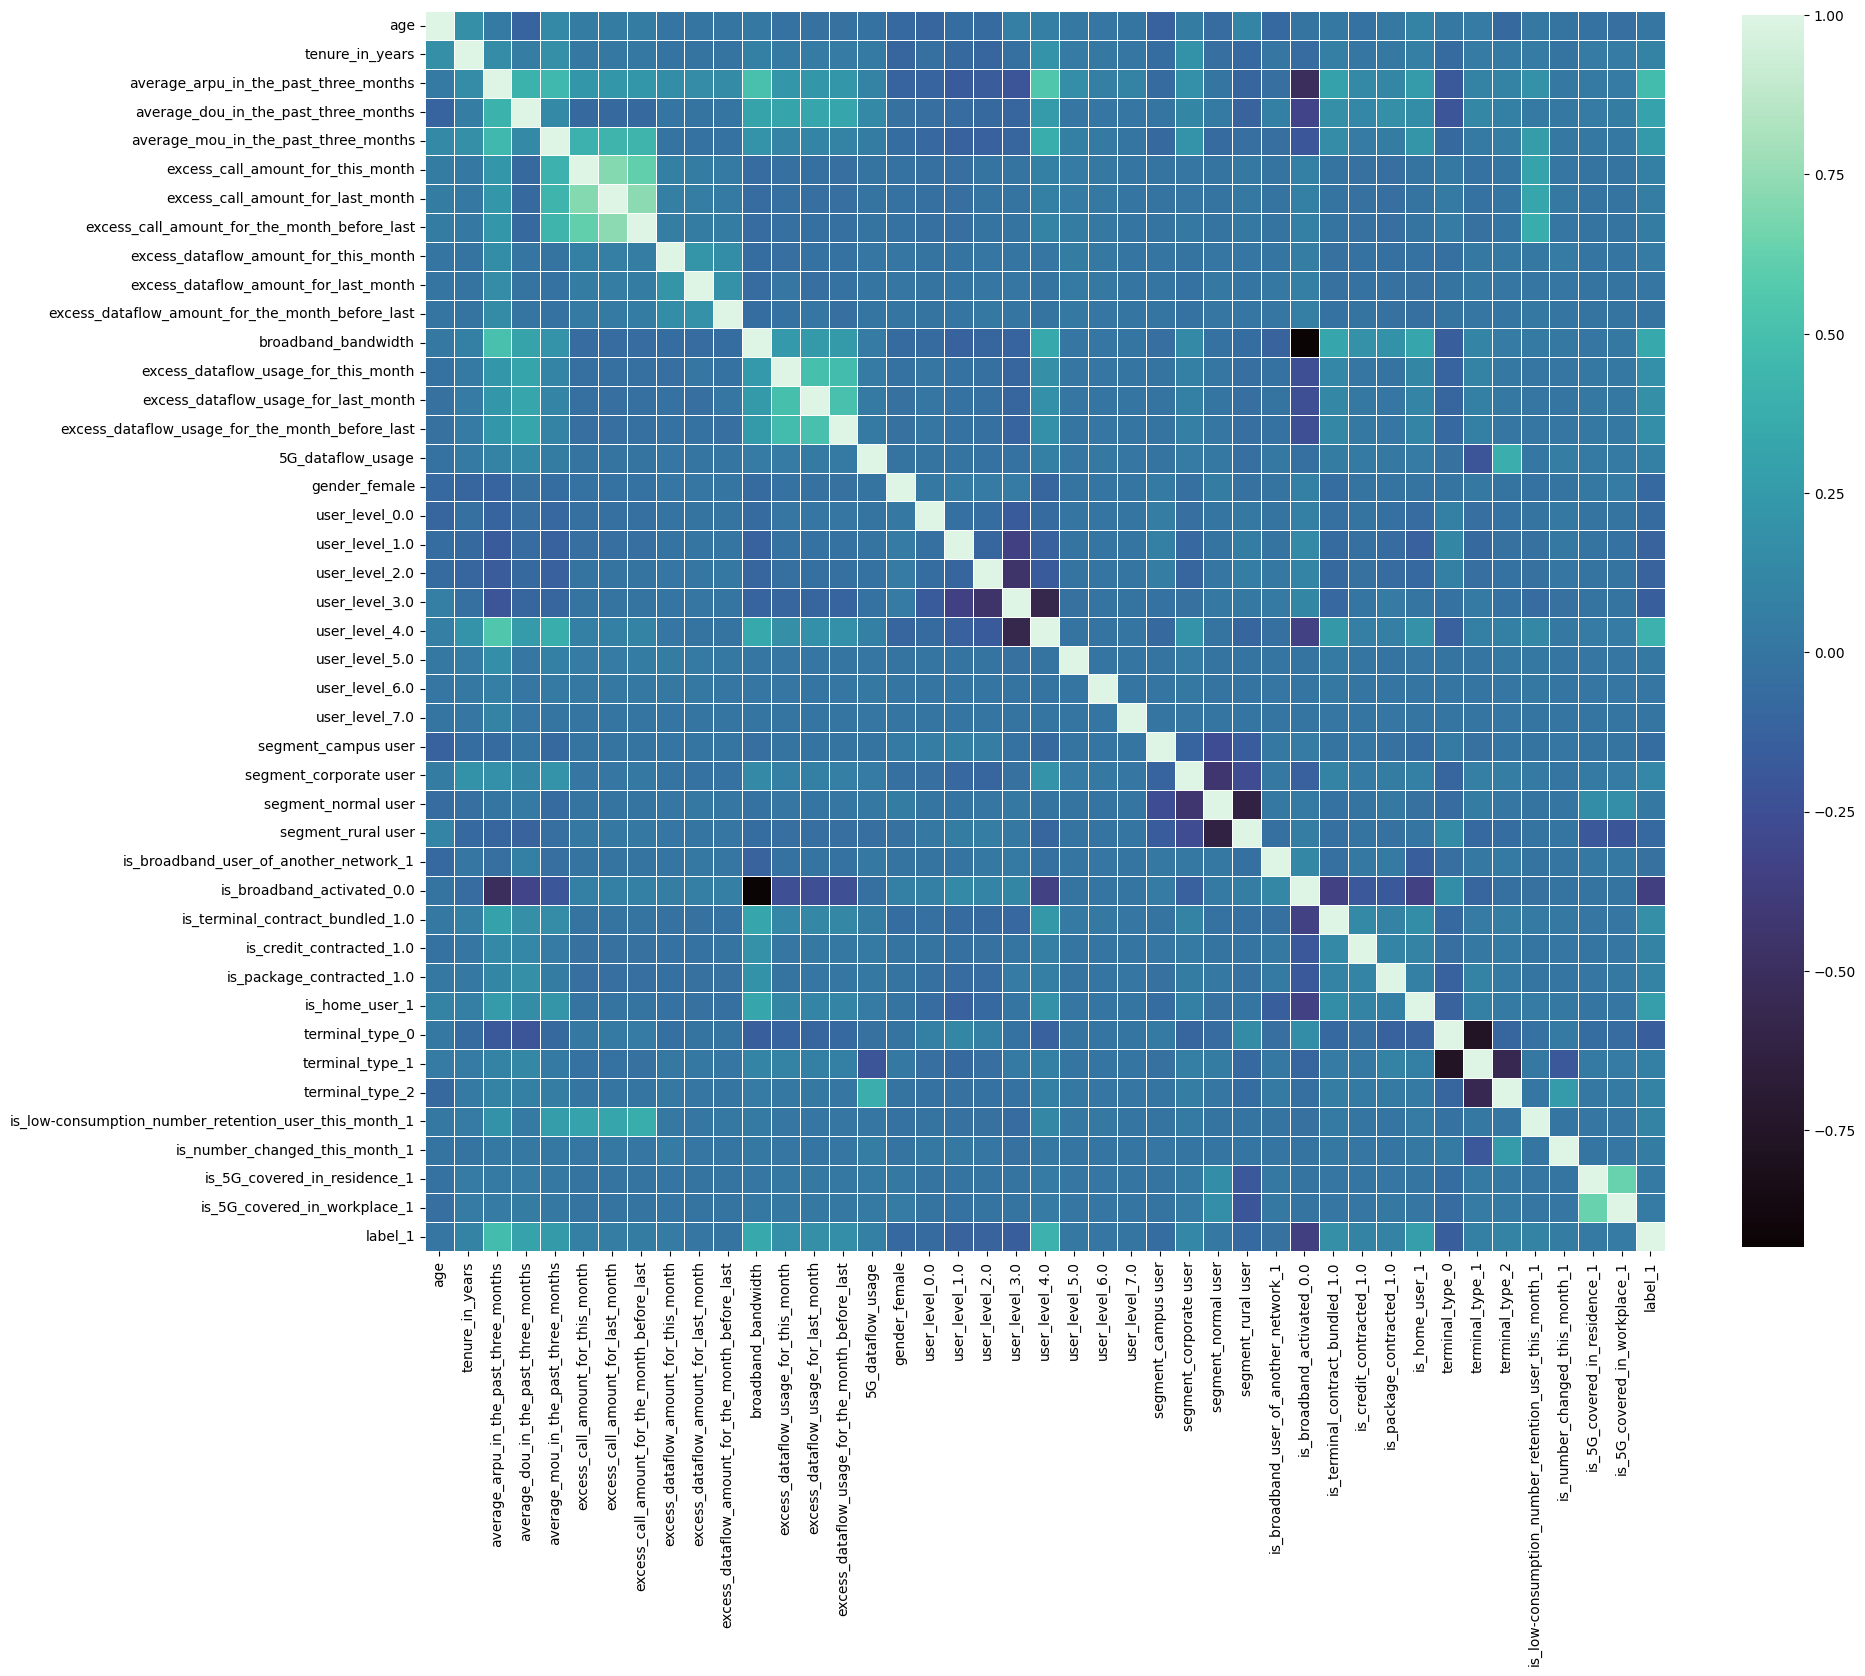

In [17]:
correl_matrix = df_dummies.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correl_matrix, cmap='mako', square=True, cbar_kws={"shrink": .8}, linewidths=.5)          
plt.show()

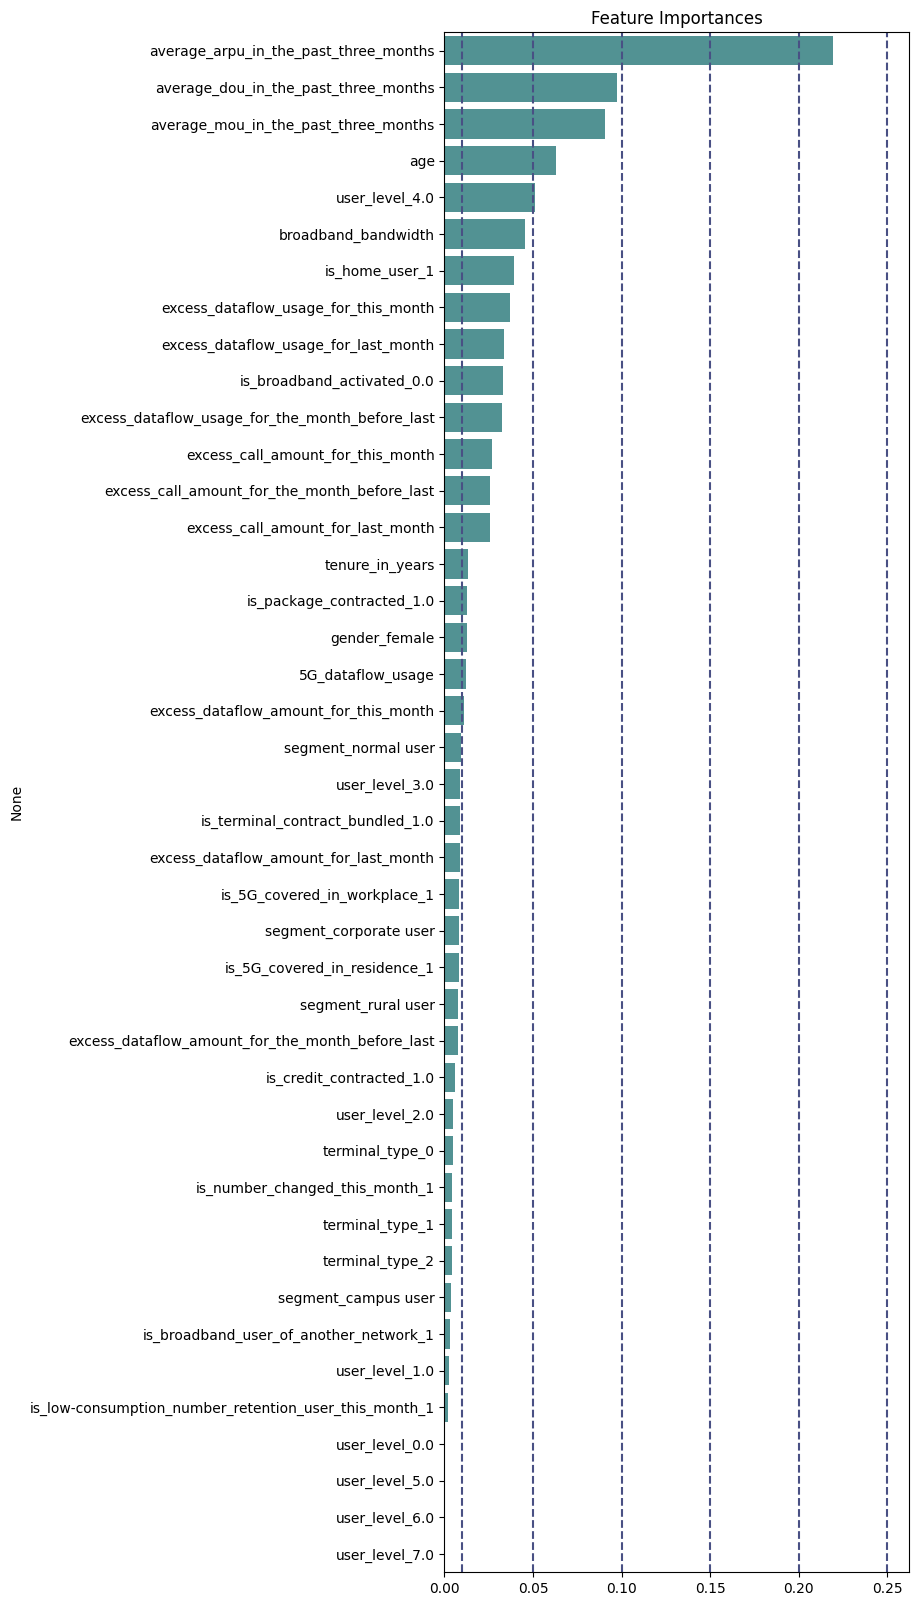

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df_dummies.select_dtypes(include=['category']).columns:
    le = LabelEncoder()
    df_dummies[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df_dummies.drop(columns=['label_1'])
y = df_dummies['label_1']

clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

feature = clf.feature_importances_
imp = pd.Series(data = feature, index = X.columns).sort_values(ascending=False)
# indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(6, 20))
plt.title("Feature Importances")
sns.barplot(y = imp.index, x = imp.values, orient='h', color = '#479C9E')
plt.axvline(x=0.01, linestyle="--", color="#495084")
plt.axvline(x=0.05, linestyle="--", color="#495084")
plt.axvline(x=0.1, linestyle="--", color="#495084")
plt.axvline(x=0.15, linestyle="--", color="#495084")
plt.axvline(x=0.20, linestyle="--", color="#495084")
plt.axvline(x=0.25, linestyle="--", color="#495084")
plt.show()

# Feature Engineering

In [19]:
#import move up!👍

In [20]:
df.dtypes

gender                                                 category
age                                                       int64
user_level                                             category
tenure_in_years                                           int64
segment                                                category
this_month_arpu                                         float64
last_month_arpu                                         float64
the_month_before_last_arpu                              float64
this_month_dou                                          float64
last_month_dou                                          float64
the_month_before_last_dou                               float64
this_month_mou                                          float64
last_month_mou                                          float64
the_month_before_last_mou                               float64
average_arpu_in_the_past_three_months                   float64
average_dou_in_the_past_three_months    

In [21]:
df_fe = df.copy()

In [22]:
df_fe.shape

(138918, 44)

## Generate Features

In [23]:
# Calculate the average for the past three months (call and data overage)
df_fe['average_excess_call_amount_in_past_three_months'] = df_fe[['excess_call_amount_for_this_month', 
                                                                  'excess_call_amount_for_last_month', 
                                                                  'excess_call_amount_for_the_month_before_last']].mean(axis=1)

df_fe['average_excess_dataflow_amount_in_past_three_months'] = df_fe[['excess_dataflow_amount_for_this_month', 
                                                                      'excess_dataflow_amount_for_last_month', 
                                                                      'excess_dataflow_amount_for_the_month_before_last']].mean(axis=1)

df_fe['average_excess_dataflow_usage_for_this_month_in_past_three_months'] = df_fe[['excess_dataflow_usage_for_this_month', 
                                                                        'excess_dataflow_usage_for_last_month', 
                                                                        'excess_dataflow_usage_for_the_month_before_last']].mean(axis=1)

# Calculate ARPU growth
df_fe['last_month_arpu_growth'] = df_fe['last_month_arpu'] - df_fe['the_month_before_last_arpu']
df_fe['this_month_arpu_growth'] = df_fe['this_month_arpu'] - df_fe['last_month_arpu']

# Calculate DOU growth (data usage)
df_fe['last_month_dou_growth'] = df_fe['last_month_dou'] - df_fe['the_month_before_last_dou']
df_fe['this_month_dou_growth'] = df_fe['this_month_dou'] - df_fe['last_month_dou']

# Calculate MOU growth (voice minutes usage)
df_fe['last_month_mou_growth'] = df_fe['last_month_mou'] - df_fe['the_month_before_last_mou']
df_fe['this_month_mou_growth'] = df_fe['this_month_mou'] - df_fe['last_month_mou']

# Calculate excess call amount growth
df_fe['last_month_excess_call_amount_growth'] = df_fe['excess_call_amount_for_last_month'] - df_fe['excess_call_amount_for_the_month_before_last']
df_fe['this_month_excess_call_amount_growth'] = df_fe['excess_call_amount_for_this_month'] - df_fe['excess_call_amount_for_last_month']

# Calculate excess dataflow amount growth
df_fe['last_month_excess_dataflow_amount_growth'] = df_fe['excess_dataflow_amount_for_last_month'] - df_fe['excess_dataflow_amount_for_the_month_before_last']
df_fe['this_month_excess_dataflow_amount_growth'] = df_fe['excess_dataflow_amount_for_this_month'] - df_fe['excess_dataflow_amount_for_last_month']

# Calculate user dataflow saturation growth
df_fe['last_month_user_dataflow_saturation_growth'] = df_fe['excess_dataflow_usage_for_last_month'] - df_fe['excess_dataflow_usage_for_the_month_before_last']
df_fe['this_month_user_dataflow_saturation_growth'] = df_fe['excess_dataflow_usage_for_this_month'] - df_fe['excess_dataflow_usage_for_last_month']


In [24]:
df_fe.shape

(138918, 59)

In [25]:
df_fe.head()

gender  age user_level  tenure_in_years      segment  this_month_arpu  \
0  female   46        3.0                5  normal user            69.30   
1    male   53        2.0                1   rural user            19.20   
2  female   30        2.0                1  campus user            33.94   
3    male   41        3.0                1  normal user            16.96   
4  female   31        3.0                1  normal user            48.40   

   last_month_arpu  the_month_before_last_arpu  this_month_dou  \
0            69.00                       69.00         5650.91   
1            13.64                       12.24            0.02   
2            24.00                       18.00         2345.84   
3            16.20                       16.20            0.00   
4            48.00                       48.20         1579.82   

   last_month_dou  the_month_before_last_dou  this_month_mou  last_month_mou  \
0         4233.87                    3579.13           281.0           297.0   
1            0.02                       0.02           250.0           198.0   
2          599.83                    1259.24            68.0           113.0   
3         3910.92                       0.00            21.0            18.0   
4         2773.49                    3380.42            66.0           179.0   

   the_month_before_last_mou  average_arpu_in_the_past_three_months  \
0                      576.0                                  69.10   
1                      370.0                                  15.03   
2                      104.0                                  25.31   
3                       50.0                                  16.45   
4                      145.0                                  48.20   

   average_dou_in_the_past_three_months  average_mou_in_the_past_three_months  \
0                               4487.97                                384.67   
1                                  0.02                                272.67   
2                               1401.64                                 95.00   
3                               1303.64                                 29.67   
4                               2577.91                                130.00   

   excess_call_amount_for_this_month  excess_call_amount_for_last_month  \
0                               0.00                               0.00   
1                              13.20                               7.64   
2                               0.00                               0.00   
3                               0.76                               0.00   
4                               0.00                               0.00   

   excess_call_amount_for_the_month_before_last  \
0                                          0.00   
1                                          6.24   
2                                          0.00   
3                                          0.00   
4                                          0.00   

   excess_dataflow_amount_for_this_month  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   excess_dataflow_amount_for_last_month  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   excess_dataflow_amount_for_the_month_before_last  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

  is_broadband_user_of_this_network is_broadband_user_of_another_network  \
0                                 1                        

In [26]:
#df_fe['label']

In [27]:
from sklearn.preprocessing import LabelEncoder


le_gender = LabelEncoder()
le_segment = LabelEncoder()
df_fe2= df_fe.copy()
df_fe2['gender'] = le_gender.fit_transform(df_fe['gender'])

df_fe2['segment'] = le_segment.fit_transform(df_fe['segment'])

print(df_fe2[['gender', 'segment']].head())


   gender  segment
0       0        2
1       1        3
2       0        0
3       1        2
4       0        2


In [28]:
#ADDED THIS
#df_fe2 only used to detect correlation, no need to do this.
#we need to keep category variables to be categorical
#df_fe = df_fe2

In [29]:
corr_matrix = df_fe2.corr().abs()
corr_matrix.head()

gender       age  user_level  tenure_in_years   segment  \
gender           1.000000  0.082660    0.092589         0.100002  0.017271   
age              0.082660  1.000000    0.135060         0.172719  0.113352   
user_level       0.092589  0.135060    1.000000         0.197065  0.072054   
tenure_in_years  0.100002  0.172719    0.197065         1.000000  0.100183   
segment          0.017271  0.113352    0.072054         0.100183  1.000000   

                 this_month_arpu  last_month_arpu  the_month_before_last_arpu  \
gender                  0.103542         0.100470                    0.104144   
age                     0.031741         0.030630                    0.034993   
user_level              0.441990         0.442918                    0.443917   
tenure_in_years         0.139995         0.139167                    0.144004   
segment                 0.089698         0.085197                    0.086982   

                 this_month_dou  last_month_dou  the_month_before_last_dou  \
gender                 0.030519        0.017008                   0.028803   
age                    0.082364        0.075985                   0.094613   
user_level             0.188176        0.179226                   0.146924   
tenure_in_years        0.043343        0.052138                   0.036686   
segment                0.089871        0.092250                   0.088534   

                 this_month_mou  last_month_mou  the_month_before_last_mou  \
gender                 0.053454        0.055280                   0.052484   
age                    0.132904        0.132375                   0.135794   
user_level             0.329002        0.322810                   0.324628   
tenure_in_years        0.163128        0.160993                   0.169409   
segment                0.065496        0.060239                   0.066275   

                 average_arpu_in_the_past_three_months  \
gender                                        0.113040   
age                                           0.025978   
user_level                                    0.480173   
tenure_in_years                               0.150524   
segment                                       0.095868   

                 average_dou_in_the_past_three_months  \
gender                                       0.032052   
age                                          0.114759   
user_level                                   0.201931   
tenure_in_years                              0.049332   
segment                                      0.110232   

                 average_mou_in_the_past_three_months  \
gender                                       0.056144   
age                                          0.136902   
user_level                                   0.341055   
tenure_in_years                              0.171483   
segment                                      0.067339   

                 excess_call_amount_for_this_month  \
gender                                    0.020565   
age                                       0.040750   
user_level                                0.088039   
tenure_in_years                           0.016937   
segment                                   0.015524   

                 excess_call_amount_for_last_month  \
gender                                    0.020976   
age                                       0.043311   
user_level                                0.089290   
tenure_in_years                           0.018044   
segment                                   0.016910   

                 excess_call_amount_for_the_month_before_last  \
gender                                               0.020732   
age                                                  0.044616   
user_level                                           0.091180   
tenure_in_years                                      0.020795   
segment                                              0.013320   

                 excess_dataflow_amount_for_this_

In [30]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

upper.head()

gender      age  user_level  tenure_in_years   segment  \
gender              NaN  0.08266    0.092589         0.100002  0.017271   
age                 NaN      NaN    0.135060         0.172719  0.113352   
user_level          NaN      NaN         NaN         0.197065  0.072054   
tenure_in_years     NaN      NaN         NaN              NaN  0.100183   
segment             NaN      NaN         NaN              NaN       NaN   

                 this_month_arpu  last_month_arpu  the_month_before_last_arpu  \
gender                  0.103542         0.100470                    0.104144   
age                     0.031741         0.030630                    0.034993   
user_level              0.441990         0.442918                    0.443917   
tenure_in_years         0.139995         0.139167                    0.144004   
segment                 0.089698         0.085197                    0.086982   

                 this_month_dou  last_month_dou  the_month_before_last_dou  \
gender                 0.030519        0.017008                   0.028803   
age                    0.082364        0.075985                   0.094613   
user_level             0.188176        0.179226                   0.146924   
tenure_in_years        0.043343        0.052138                   0.036686   
segment                0.089871        0.092250                   0.088534   

                 this_month_mou  last_month_mou  the_month_before_last_mou  \
gender                 0.053454        0.055280                   0.052484   
age                    0.132904        0.132375                   0.135794   
user_level             0.329002        0.322810                   0.324628   
tenure_in_years        0.163128        0.160993                   0.169409   
segment                0.065496        0.060239                   0.066275   

                 average_arpu_in_the_past_three_months  \
gender                                        0.113040   
age                                           0.025978   
user_level                                    0.480173   
tenure_in_years                               0.150524   
segment                                       0.095868   

                 average_dou_in_the_past_three_months  \
gender                                       0.032052   
age                                          0.114759   
user_level                                   0.201931   
tenure_in_years                              0.049332   
segment                                      0.110232   

                 average_mou_in_the_past_three_months  \
gender                                       0.056144   
age                                          0.136902   
user_level                                   0.341055   
tenure_in_years                              0.171483   
segment                                      0.067339   

                 excess_call_amount_for_this_month  \
gender                                    0.020565   
age                                       0.040750   
user_level                                0.088039   
tenure_in_years                           0.016937   
segment                                   0.015524   

                 excess_call_amount_for_last_month  \
gender                                    0.020976   
age                                       0.043311   
user_level                                0.089290   
tenure_in_years                           0.018044   
segment                                   0.016910   

                 excess_call_amount_for_the_month_before_last  \
gender                                               0.020732   
age                                                  0.044616   
user_level                                           0.091180   
tenure_in_years                                      0.020795   
segment                                              0.013320   

                 excess_dataflow_amount_for_this_month  \
gender 

In [31]:
# Threshold for removing correlated variables
threshold = 0.9

# Find columns to drop based on the correlation threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Print the names of columns to drop
print('Columns to drop due to high correlation:', to_drop)

# Drop the highly correlated columns from the dataframe
df_fe = df_fe.drop(columns=to_drop)

# Return the list of dropped columns
to_drop


Columns to drop due to high correlation: ['average_arpu_in_the_past_three_months', 'average_mou_in_the_past_three_months', 'broadband_bandwidth', 'is_broadband_activated', 'is_broadband_contract_bundled', 'main_package_fee', 'average_excess_call_amount_in_past_three_months']


['average_arpu_in_the_past_three_months',
 'average_mou_in_the_past_three_months',
 'broadband_bandwidth',
 'is_broadband_activated',
 'is_broadband_contract_bundled',
 'main_package_fee',
 'average_excess_call_amount_in_past_three_months']

In [32]:
# Find categorical features (category type)
cat_feature = df_fe.select_dtypes(include=['category']).columns.tolist()

# Find numerical features (int and float types)
num_feature = df_fe.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()

# Print the results
print("Categorical Features:", cat_feature)
print("Numerical Features:", num_feature)


Categorical Features: ['gender', 'user_level', 'segment', 'is_broadband_user_of_this_network', 'is_broadband_user_of_another_network', 'is_terminal_contract_bundled', 'is_credit_contracted', 'is_package_contracted', 'is_home_user', 'terminal_type', 'is_low-consumption_number_retention_user_this_month', 'is_number_changed_this_month', 'is_5G_covered_in_residence', 'is_5G_covered_in_workplace', 'label']
Numerical Features: ['age', 'tenure_in_years', 'this_month_arpu', 'last_month_arpu', 'the_month_before_last_arpu', 'this_month_dou', 'last_month_dou', 'the_month_before_last_dou', 'this_month_mou', 'last_month_mou', 'the_month_before_last_mou', 'average_dou_in_the_past_three_months', 'excess_call_amount_for_this_month', 'excess_call_amount_for_last_month', 'excess_call_amount_for_the_month_before_last', 'excess_dataflow_amount_for_this_month', 'excess_dataflow_amount_for_last_month', 'excess_dataflow_amount_for_the_month_before_last', 'total_package_fee', 'excess_dataflow_usage_for_this_m

In [33]:
df_fe.shape

(138918, 52)

## Label Encoding

In [34]:
# Step 1: Convert 'label' to numerical using LabelEncoder
le = LabelEncoder()
df_fe['label'] = le.fit_transform(df_fe['label'])
df_fe['gender'] = le.fit_transform(df_fe['gender'])
df_fe['segment'] = le.fit_transform(df_fe['segment'])

In [35]:
df_fe['user_level'].dtype

CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ordered=False, categories_dtype=float64)

In [36]:
#df_fe['segment']

In [37]:
df_fe['segment'].dtype

dtype('int64')

In [38]:
# Step 2: Define the target encoding function
def target_encode(df, categorical_col, target_col):
    # Calculate the mean of the target variable for each category
    mean_target = df.groupby(categorical_col)[target_col].mean()
    
    # Replace the original categorical column with the target-encoded values
    df[categorical_col] = df[categorical_col].map(mean_target)
    
    return df

# Apply target encoding to 'user_level' and 'segment' and replace original columns
df_fe = target_encode(df_fe, 'user_level', 'label')
df_fe = target_encode(df_fe, 'segment', 'label')

# Check the encoded data
print(df_fe[['user_level', 'segment']].head())


  user_level   segment
0   0.151795  0.206844
1   0.070243  0.146179
2   0.070243  0.120251
3   0.151795  0.206844
4   0.151795  0.206844


In [39]:
df_fe['user_level'] = df_fe['user_level'].astype('float64')
df_fe['segment'] = df_fe['segment'].astype('float64')

In [40]:
df_fe.dtypes

gender                                                                  int64
age                                                                     int64
user_level                                                            float64
tenure_in_years                                                         int64
segment                                                               float64
this_month_arpu                                                       float64
last_month_arpu                                                       float64
the_month_before_last_arpu                                            float64
this_month_dou                                                        float64
last_month_dou                                                        float64
the_month_before_last_dou                                             float64
this_month_mou                                                        float64
last_month_mou                                                  

## Normalization

In [41]:
df_fe[num_feature] = StandardScaler().fit_transform(df_fe[num_feature])

In [42]:
df_fe.head(20)

gender       age  user_level  tenure_in_years   segment  this_month_arpu  \
0        0  0.253601    0.151795         1.038188  0.206844         0.192391   
1        1  0.925952    0.070243        -0.275232  0.146179        -0.746888   
2        0 -1.283199    0.070243        -0.275232  0.120251        -0.470541   
3        1 -0.226649    0.151795        -0.275232  0.206844        -0.788884   
4        0 -1.187149    0.151795        -0.275232  0.206844        -0.199444   
5        1  1.118052    0.032455        -0.275232  0.146179        -0.237690   
6        1  1.118052    0.151795        -0.275232  0.314981        -0.415234   
7        0 -0.610849    0.537112        -0.275232  0.314981         1.313526   
8        0  1.214102    0.070243        -0.275232  0.206844        -0.750638   
9        1 -1.763449    0.151795        -0.275232  0.120251        -0.580030   
10       1  0.349651    0.151795        -0.275232  0.206844        -0.300309   
11       1 -0.706899    0.151795        -0.275232  0.206844         0.934815   
12       0 -0.226649    0.151795        -0.275232  0.206844        -0.529410   
13       1  0.733852    0.151795        -0.275232  0.120251        -1.106851   
14       0  0.733852    0.537112        -0.275232  0.146179        -0.750638   
15       1 -1.667399    0.151795        -0.275232  0.206844        -0.747076   
16       0  1.118052    0.151795        -0.275232  0.206844         0.767957   
17       0 -1.187149    0.014809        -0.275232  0.146179        -1.106851   
18       1  1.406202    0.151795        -0.275232  0.146179        -0.713141   
19       0 -1.763449    0.151795        -0.275232  0.146179        -0.716891   

    last_month_arpu  the_month_before_last_arpu  this_month_dou  \
0          0.198692                    0.202208        1.242458   
1         -0.874343                   -0.897417       -0.705585   
2         -0.673536                   -0.785827        0.103094   
3         -0.824723                   -0.820699       -0.705592   
4         -0.208348                   -0.200755       -0.160978   
5         -0.402176                   -0.335787       -0.701942   
6         -0.484360                   -0.489804       -0.705589   
7          1.361662                    1.364602        1.684535   
8         -0.770451                   -0.747080       -0.705592   
9         -0.596005                   -0.566909       -0.705582   
10        -0.557239                   -0.549473       -0.268217   
11         1.011802                    1.021696       -0.705503   
12        -0.541151                   -0.249769        3.213247   
13        -1.138725                   -0.262750       -0.705592   
14        -0.770451                   -0.766454       -0.705592   
15        -0.699509                   -0.764516       -0.704910   
16         0.799560                    0.802778       -0.445937   
17        -1.138725                   -0.803263       -0.650825   
18        -0.731685                   -0.727707       -0.705592   
19        -0.641167                   -0.704459       -0.705592   

    last_month_dou  the_month_before_last_dou  this_month_mou  last_month_mou  \
0         0.869615                   0.567433       -0.130516       -0.080765   
1        -0.733998                  -0.705107       -0.213305       -0.347474   
2        -0.506814                  -0.257396       -0.699356       -0.576466   
3         0.747294                  -0.705114       -0.824875       -0.832399   
4         0.316481                   0.496782       -0.704697       -0.398661   
5        -0.733369                  -0.701388       -0.531108       -0.864727   
6        -0.733998                  -0.705096       10.247473        9.334860   
7         1.110976                   1.613713        3.546913        2.222628   
8        -0.734006                  -0.705114       -0.290753       -0.323228   
9         2.215962                   2.114155       -0.165234        1.904733   
10       -0.387437      

In [43]:
df_fe.dtypes

gender                                                                  int64
age                                                                   float64
user_level                                                            float64
tenure_in_years                                                       float64
segment                                                               float64
this_month_arpu                                                       float64
last_month_arpu                                                       float64
the_month_before_last_arpu                                            float64
this_month_dou                                                        float64
last_month_dou                                                        float64
the_month_before_last_dou                                             float64
this_month_mou                                                        float64
last_month_mou                                                  

# Machine Learning

In [69]:
X = pd.get_dummies(df_fe, drop_first = True).drop(columns='label')
y = df_fe['label']

In [70]:
X.head()

gender       age  user_level  tenure_in_years   segment  this_month_arpu  \
0       0  0.253601    0.151795         1.038188  0.206844         0.192391   
1       1  0.925952    0.070243        -0.275232  0.146179        -0.746888   
2       0 -1.283199    0.070243        -0.275232  0.120251        -0.470541   
3       1 -0.226649    0.151795        -0.275232  0.206844        -0.788884   
4       0 -1.187149    0.151795        -0.275232  0.206844        -0.199444   

   last_month_arpu  the_month_before_last_arpu  this_month_dou  \
0         0.198692                    0.202208        1.242458   
1        -0.874343                   -0.897417       -0.705585   
2        -0.673536                   -0.785827        0.103094   
3        -0.824723                   -0.820699       -0.705592   
4        -0.208348                   -0.200755       -0.160978   

   last_month_dou  the_month_before_last_dou  this_month_mou  last_month_mou  \
0        0.869615                   0.567433       -0.130516       -0.080765   
1       -0.733998                  -0.705107       -0.213305       -0.347474   
2       -0.506814                  -0.257396       -0.699356       -0.576466   
3        0.747294                  -0.705114       -0.824875       -0.832399   
4        0.316481                   0.496782       -0.704697       -0.398661   

   the_month_before_last_mou  average_dou_in_the_past_three_months  \
0                   0.626483                              1.066589   
1                   0.084919                             -0.878146   
2                  -0.614382                             -0.270791   
3                  -0.756345                             -0.313256   
4                  -0.506595                              0.238915   

   excess_call_amount_for_this_month  excess_call_amount_for_last_month  \
0                          -0.309263                          -0.315651   
1                           0.589927                           0.220586   
2                          -0.309263                          -0.315651   
3                          -0.257492                          -0.315651   
4                          -0.309263                          -0.315651   

   excess_call_amount_for_the_month_before_last  \
0                                     -0.318314   
1                                      0.105642   
2                                     -0.318314   
3                                     -0.318314   
4                                     -0.318314   

   excess_dataflow_amount_for_this_month  \
0                              -0.141964   
1                              -0.141964   
2                              -0.141964   
3                              -0.141964   
4                              -0.141964   

   excess_dataflow_amount_for_last_month  \
0                               -0.14447   
1                               -0.14447   
2                               -0.14447   
3                               -0.14447   
4                               -0.14447   

   excess_dataflow_amount_for_the_month_before_last  total_package_fee  \
0                                         -0.144541           0.484740   
1                                         -0.144541          -0.485492   
2                                         -0.144541          -0.728050   
3                                         -0.144541          -0.728050   
4                                         -0.144541           0.969856   

   excess_dataflow_usage_for_this_month  excess_dataflow_usage_for_last_month  \
0                             -0.357699                             -0.356666   
1                             -0.357699                             -0.356666   
2                             -0.357699                             -0.356666   
3                             -0.357699                             -0.356666   
4                             -0.357699                             -0.356666   

   excess

In [71]:
y.tail()

139590    0
139591    0
139592    1
139593    0
139594    0
Name: label, dtype: int64

In [72]:
# Updated color values
primary_color = "#495084"  # RGB: 73, 80, 132
secondary_color = "#479C9E"  # RGB: 71, 156, 158

# Helper function to plot the Precision-Recall curve
def plot_PR_curve(classifier, X, y):
    y_score = cross_val_predict(classifier, X, y, method='predict_proba')[:, 1]
    precision, recall, thresholds = precision_recall_curve(y, y_score)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(recall, precision, color=primary_color)  # Use primary color
    ax.set_title('Precision-Recall Curve', color=primary_color)
    ax.set_ylabel('Precision', color=primary_color)
    ax.set_xlabel('Recall', color=primary_color)
    ax.tick_params(colors=primary_color)
    plt.show()

# Helper function to plot the confusion matrix with the specified colors
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    # Use secondary color for heatmap
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=labels, cmap=sns.light_palette(secondary_color, as_cmap=True), fmt='', cbar=False, annot_kws={"color": primary_color}, ax=ax)
    plt.show()

# Function to perform cross-validation evaluation, including ROC AUC and Recall
def cross_validation_evaluation(classifier, X, y, cv=5):
    cv_roc_auc_scores = cross_val_score(classifier, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    cv_recall_scores = cross_val_score(classifier, X, y, cv=cv, scoring='recall', n_jobs=-1)
    
    print('Cross-Validation ROC AUC scores:', cv_roc_auc_scores)
    print('Mean Cross-Validation ROC AUC:', np.mean(cv_roc_auc_scores))
    
    print('Cross-Validation Recall scores:', cv_recall_scores)
    print('Mean Cross-Validation Recall:', np.mean(cv_recall_scores))

def append_model_results_to_table(model_name, classifier, X, y, result_df, cv=5):
    # Perform cross-validation for various metrics
    cv_accuracy_scores = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
    cv_roc_auc_scores = cross_val_score(classifier, X, y, cv=cv, scoring='roc_auc')
    cv_recall_scores = cross_val_score(classifier, X, y, cv=cv, scoring='recall')
    cv_precision_scores = cross_val_score(classifier, X, y, cv=cv, scoring='precision')
    cv_f1_scores = cross_val_score(classifier, X, y, cv=cv, scoring='f1')
    
    # Calculate the mean of each metric
    model_results = {
        'Model Name': model_name,
        'Accuracy': np.mean(cv_accuracy_scores),
        'ROC AUC': np.mean(cv_roc_auc_scores),
        'Recall': np.mean(cv_recall_scores),
        'Precision': np.mean(cv_precision_scores),
        'F1 Score': np.mean(cv_f1_scores)
    }
    
    # Convert model_results to DataFrame
    results_df = pd.DataFrame([model_results])
    
    # Use pd.concat to append the new row to result_df
    result_df = pd.concat([result_df, results_df], ignore_index=True)
    
    return result_df

# Evaluation function using cross_val_predict to get predictions for the whole dataset
def model_evaluation(classifier, X, y):
    # Generate predictions using cross_val_predict
    y_pred = cross_val_predict(classifier, X, y)
    
    # Plot confusion matrix
    plot_confusion_matrix(y, y_pred)
    
    # Calculate and print ROC AUC Score
    roc_auc = roc_auc_score(y, y_pred)
    print('ROC_AUC_SCORE: ', roc_auc)
    
    # Print classification report
    report = classification_report(y, y_pred)
    print(report)
    
    # Plot ROC curve using from_predictions
    y_prob = cross_val_predict(classifier, X, y, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    auc_score = auc(fpr, tpr)  # Calculate AUC
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(fpr, tpr, color=primary_color, label=f'ROC Curve (AUC = {auc_score:.2f})')
    ax.set_title('ROC Curve', color=primary_color)
    ax.set_xlabel('False Positive Rate', color=primary_color)
    ax.set_ylabel('True Positive Rate', color=primary_color)
    ax.tick_params(colors=primary_color)
    ax.legend(loc="lower right")
    plt.show()
   


In [73]:
X.shape

(138918, 52)

In [74]:
result_df_nonsmote = pd.DataFrame(columns=['Model Name', 'Accuracy', 'ROC AUC', 'Recall', 'Precision', 'F1 Score'])

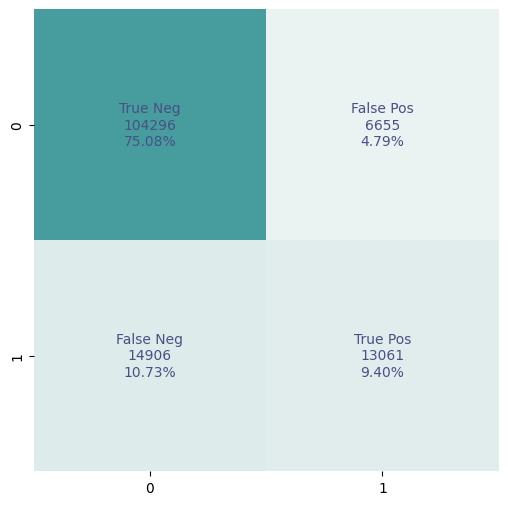

ROC_AUC_SCORE:  0.7035166313231399
              precision    recall  f1-score   support

           0       0.87      0.94      0.91    110951
           1       0.66      0.47      0.55     27967

    accuracy                           0.84    138918
   macro avg       0.77      0.70      0.73    138918
weighted avg       0.83      0.84      0.83    138918



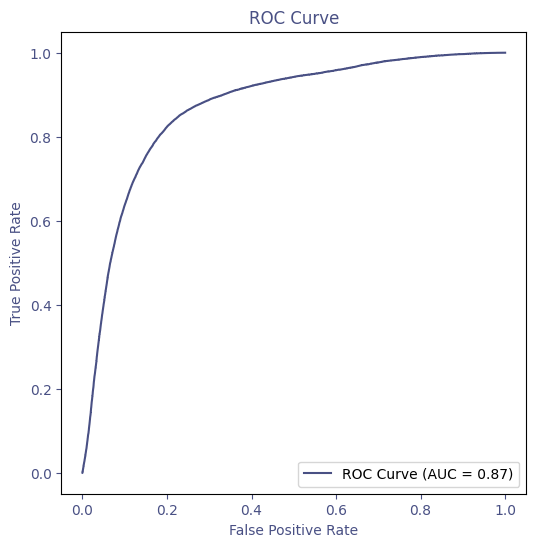

Total Model Training Time (Logistic Regression): 33s
           Model Name  Accuracy   ROC AUC    Recall  Precision  F1 Score
0  LogisticRegression  0.844793  0.870393  0.467014   0.662402  0.547792


In [75]:
### Logistic Regression
start_time = time.time()
logit_classifier = LogisticRegression()
model_evaluation(logit_classifier, X, y)
result_df_nonsmote = append_model_results_to_table('LogisticRegression', logit_classifier, X, y, result_df_nonsmote)
print('Total Model Training Time (Logistic Regression): {}s'.format(math.ceil(time.time()-start_time)))
print(result_df_nonsmote)

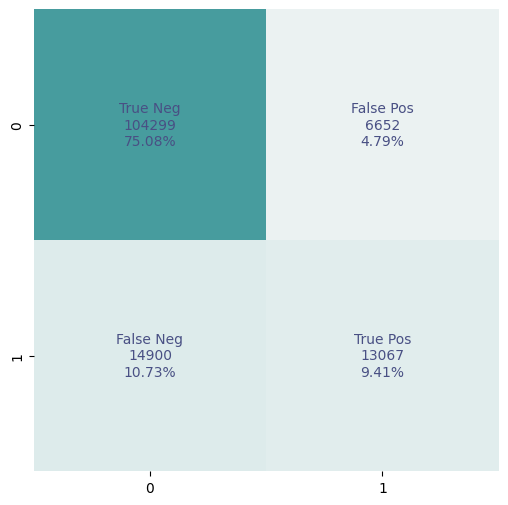

ROC_AUC_SCORE:  0.7036374200863664
              precision    recall  f1-score   support

           0       0.87      0.94      0.91    110951
           1       0.66      0.47      0.55     27967

    accuracy                           0.84    138918
   macro avg       0.77      0.70      0.73    138918
weighted avg       0.83      0.84      0.83    138918



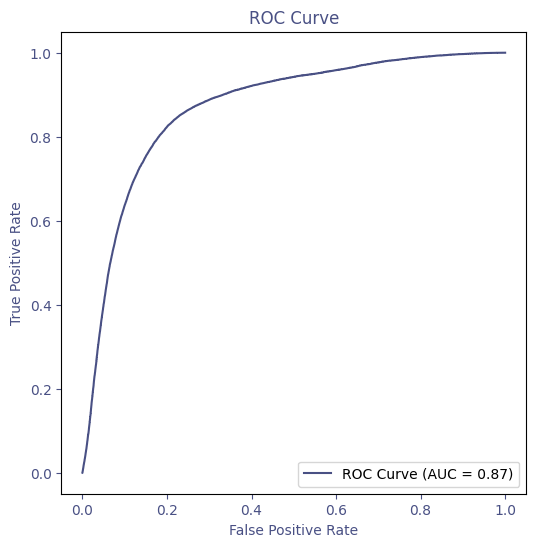

Total Model Training Time (L1 Logistic Regression with SAGA): 2976s
                      Model Name  Accuracy   ROC AUC    Recall  Precision  \
0             LogisticRegression  0.844793  0.870393  0.467014   0.662402   
1  L1 Logistic Regression (SAGA)  0.844858  0.870389  0.467229   0.662606   

   F1 Score  
0  0.547792  
1  0.548008  


In [76]:
### L1 Logistic Regression (Lasso) with SAGA Solver
start_time = time.time()
logit_classifier = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
model_evaluation(logit_classifier, X, y)
result_df_nonsmote = append_model_results_to_table('L1 Logistic Regression (SAGA)', logit_classifier, X, y, result_df_nonsmote)
print('Total Model Training Time (L1 Logistic Regression with SAGA): {}s'.format(math.ceil(time.time()-start_time)))
print(result_df_nonsmote)


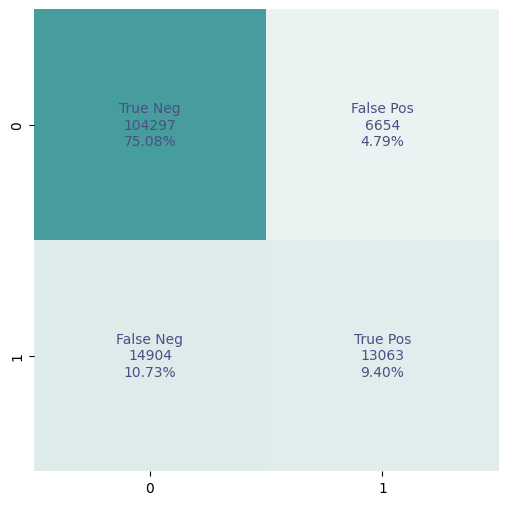

ROC_AUC_SCORE:  0.7035568942442154
              precision    recall  f1-score   support

           0       0.87      0.94      0.91    110951
           1       0.66      0.47      0.55     27967

    accuracy                           0.84    138918
   macro avg       0.77      0.70      0.73    138918
weighted avg       0.83      0.84      0.83    138918



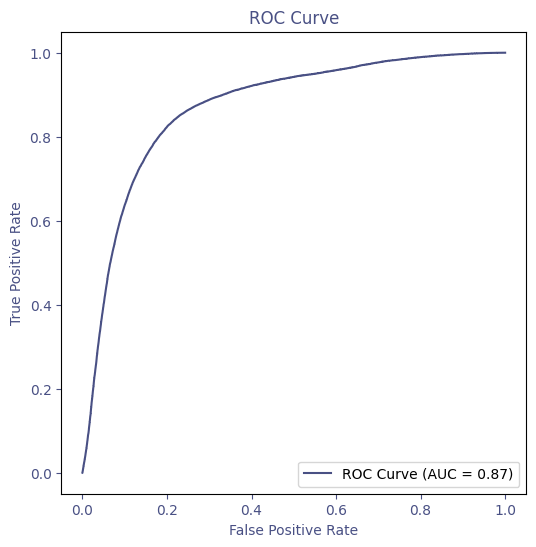

Total Model Training Time (L2 Logistic Regression with SAGA): 2296s
                      Model Name  Accuracy   ROC AUC    Recall  Precision  \
0             LogisticRegression  0.844793  0.870393  0.467014   0.662402   
1  L1 Logistic Regression (SAGA)  0.844858  0.870389  0.467229   0.662606   
2  L2 Logistic Regression (SAGA)  0.844815  0.870393  0.467086   0.662471   

   F1 Score  
0  0.547792  
1  0.548008  
2  0.547864  


In [77]:
### L2 Logistic Regression (Ridge) with SAGA Solver
start_time = time.time()
logit_classifier = LogisticRegression(penalty='l2', solver='saga', max_iter=1000)
model_evaluation(logit_classifier, X, y)
result_df_nonsmote = append_model_results_to_table('L2 Logistic Regression (SAGA)', logit_classifier, X, y, result_df_nonsmote)
print('Total Model Training Time (L2 Logistic Regression with SAGA): {}s'.format(math.ceil(time.time()-start_time)))
print(result_df_nonsmote)


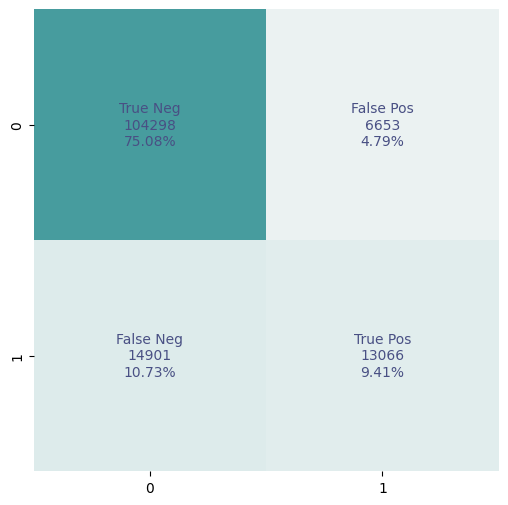

ROC_AUC_SCORE:  0.7036150353788997
              precision    recall  f1-score   support

           0       0.87      0.94      0.91    110951
           1       0.66      0.47      0.55     27967

    accuracy                           0.84    138918
   macro avg       0.77      0.70      0.73    138918
weighted avg       0.83      0.84      0.83    138918



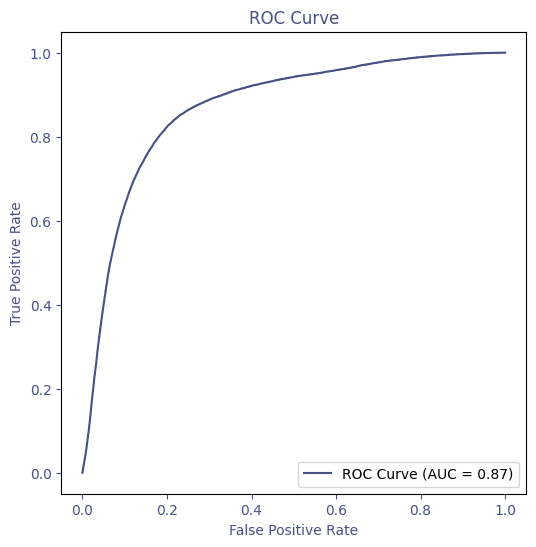

Total Model Training Time (Elastic Net Logistic Regression with SAGA): 2744s
                               Model Name  Accuracy   ROC AUC    Recall  \
0                      LogisticRegression  0.844793  0.870393  0.467014   
1           L1 Logistic Regression (SAGA)  0.844858  0.870389  0.467229   
2           L2 Logistic Regression (SAGA)  0.844815  0.870393  0.467086   
3  Elastic Net Logistic Regression (SAGA)  0.844836  0.870391  0.467157   

   Precision  F1 Score  
0   0.662402  0.547792  
1   0.662606  0.548008  
2   0.662471  0.547864  
3   0.662540  0.547967  


In [78]:
### Elastic Net Logistic Regression with SAGA Solver
start_time = time.time()
logit_classifier = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
model_evaluation(logit_classifier, X, y)
result_df_nonsmote = append_model_results_to_table('Elastic Net Logistic Regression (SAGA)', logit_classifier, X, y, result_df_nonsmote)
print('Total Model Training Time (Elastic Net Logistic Regression with SAGA): {}s'.format(math.ceil(time.time()-start_time)))
print(result_df_nonsmote)


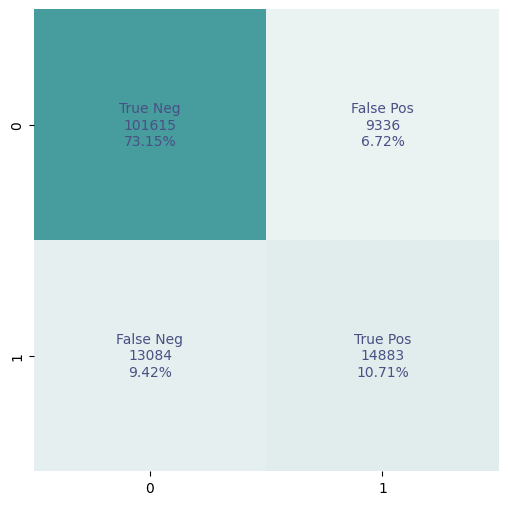

ROC_AUC_SCORE:  0.7240088264861922
              precision    recall  f1-score   support

           0       0.89      0.92      0.90    110951
           1       0.61      0.53      0.57     27967

    accuracy                           0.84    138918
   macro avg       0.75      0.72      0.74    138918
weighted avg       0.83      0.84      0.83    138918



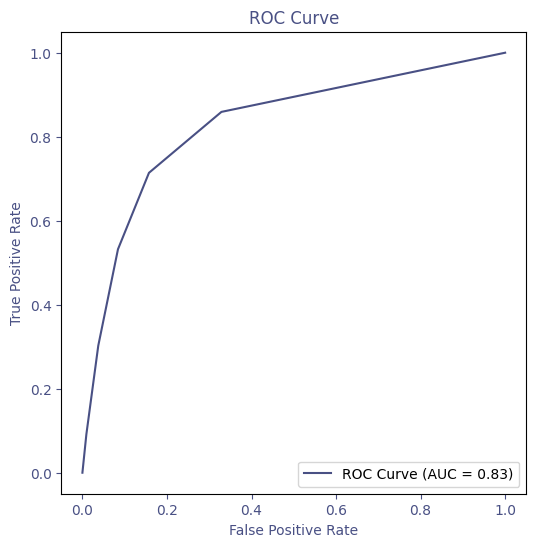

Total Model Training Time (KNN): 176s
                               Model Name  Accuracy   ROC AUC    Recall  \
0                      LogisticRegression  0.844793  0.870393  0.467014   
1           L1 Logistic Regression (SAGA)  0.844858  0.870389  0.467229   
2           L2 Logistic Regression (SAGA)  0.844815  0.870393  0.467086   
3  Elastic Net Logistic Regression (SAGA)  0.844836  0.870391  0.467157   
4                    KNeighborsClassifier  0.838610  0.829817  0.532163   

   Precision  F1 Score  
0   0.662402  0.547792  
1   0.662606  0.548008  
2   0.662471  0.547864  
3   0.662540  0.547967  
4   0.614570  0.570347  


In [79]:
### K-Nearest Neighbors (KNN)
start_time = time.time()
knn_classifier = KNeighborsClassifier()
model_evaluation(knn_classifier, X, y)
result_df_nonsmote = append_model_results_to_table('KNeighborsClassifier', knn_classifier, X, y, result_df_nonsmote)
print('Total Model Training Time (KNN): {}s'.format(math.ceil(time.time()-start_time)))

print(result_df_nonsmote)

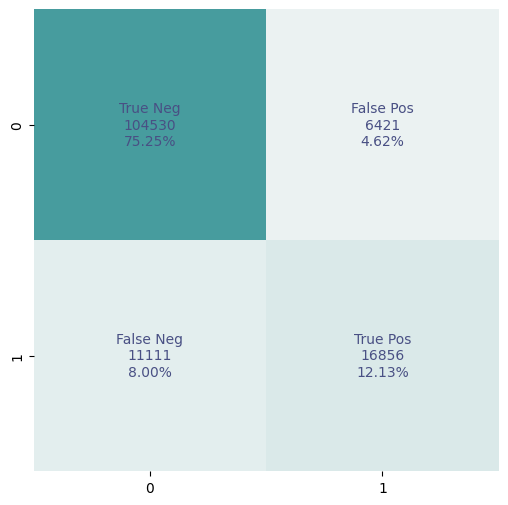

ROC_AUC_SCORE:  0.7724189715315909
              precision    recall  f1-score   support

           0       0.90      0.94      0.92    110951
           1       0.72      0.60      0.66     27967

    accuracy                           0.87    138918
   macro avg       0.81      0.77      0.79    138918
weighted avg       0.87      0.87      0.87    138918



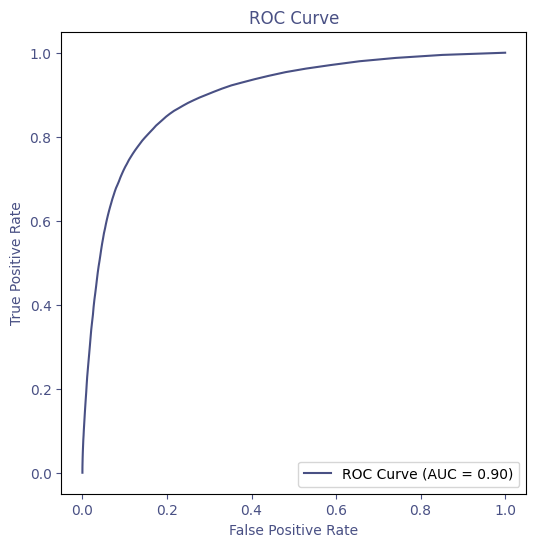

Total Model Training Time (Random Forest): 1596s
                               Model Name  Accuracy   ROC AUC    Recall  \
0                      LogisticRegression  0.844793  0.870393  0.467014   
1           L1 Logistic Regression (SAGA)  0.844858  0.870389  0.467229   
2           L2 Logistic Regression (SAGA)  0.844815  0.870393  0.467086   
3  Elastic Net Logistic Regression (SAGA)  0.844836  0.870391  0.467157   
4                    KNeighborsClassifier  0.838610  0.829817  0.532163   
5                  RandomForestClassifier  0.873796  0.897322  0.602710   

   Precision  F1 Score  
0   0.662402  0.547792  
1   0.662606  0.548008  
2   0.662471  0.547864  
3   0.662540  0.547967  
4   0.614570  0.570347  
5   0.724146  0.657865  


In [80]:
### Random Forest
start_time = time.time()
rf_classifier = RandomForestClassifier(random_state=42)
model_evaluation(rf_classifier, X, y)
result_df_nonsmote = append_model_results_to_table('RandomForestClassifier', rf_classifier, X, y, result_df_nonsmote)
print('Total Model Training Time (Random Forest): {}s'.format(math.ceil(time.time()-start_time)))
print(result_df_nonsmote)

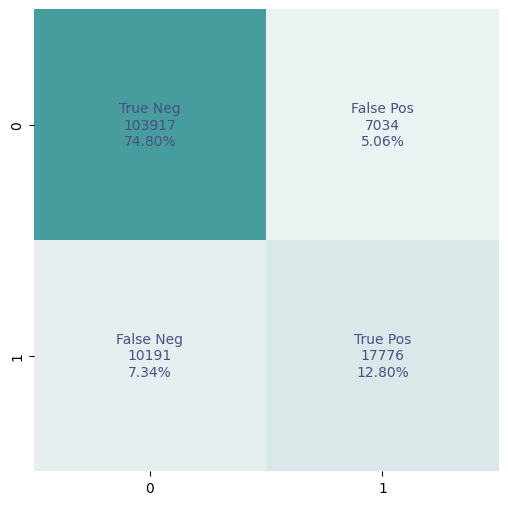

ROC_AUC_SCORE:  0.7861044473170367
              precision    recall  f1-score   support

           0       0.91      0.94      0.92    110951
           1       0.72      0.64      0.67     27967

    accuracy                           0.88    138918
   macro avg       0.81      0.79      0.80    138918
weighted avg       0.87      0.88      0.87    138918



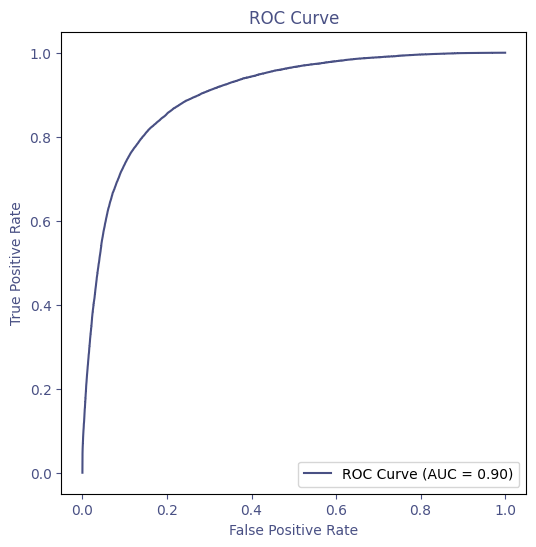

Total Model Training Time (XGBoost): 38s
                               Model Name  Accuracy   ROC AUC    Recall  \
0                      LogisticRegression  0.844793  0.870393  0.467014   
1           L1 Logistic Regression (SAGA)  0.844858  0.870389  0.467229   
2           L2 Logistic Regression (SAGA)  0.844815  0.870393  0.467086   
3  Elastic Net Logistic Regression (SAGA)  0.844836  0.870391  0.467157   
4                    KNeighborsClassifier  0.838610  0.829817  0.532163   
5                  RandomForestClassifier  0.873796  0.897322  0.602710   
6                                 XGBoost  0.876006  0.903718  0.635606   

   Precision  F1 Score  
0   0.662402  0.547792  
1   0.662606  0.548008  
2   0.662471  0.547864  
3   0.662540  0.547967  
4   0.614570  0.570347  
5   0.724146  0.657865  
6   0.716489  0.673621  


In [81]:
### XGBoost
start_time = time.time()
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_evaluation(xgb_classifier, X, y)
result_df_nonsmote = append_model_results_to_table('XGBoost', xgb_classifier, X, y, result_df_nonsmote)
print('Total Model Training Time (XGBoost): {}s'.format(math.ceil(time.time()-start_time)))
print(result_df_nonsmote)

## FALSE NEG is high, try to deal with unbalance

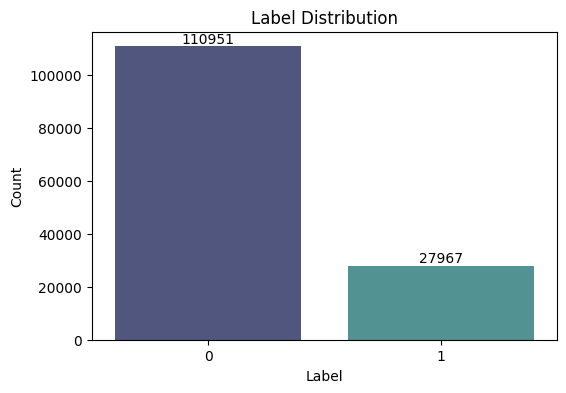

In [82]:
plt.figure(figsize=(6, 4))

# Create the countplot
ax = sns.countplot(x='label', data=df_fe, palette=[primary_color, secondary_color])

# Add title and labels
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.show()

In [83]:
df_fe.head()

gender       age  user_level  tenure_in_years   segment  this_month_arpu  \
0       0  0.253601    0.151795         1.038188  0.206844         0.192391   
1       1  0.925952    0.070243        -0.275232  0.146179        -0.746888   
2       0 -1.283199    0.070243        -0.275232  0.120251        -0.470541   
3       1 -0.226649    0.151795        -0.275232  0.206844        -0.788884   
4       0 -1.187149    0.151795        -0.275232  0.206844        -0.199444   

   last_month_arpu  the_month_before_last_arpu  this_month_dou  \
0         0.198692                    0.202208        1.242458   
1        -0.874343                   -0.897417       -0.705585   
2        -0.673536                   -0.785827        0.103094   
3        -0.824723                   -0.820699       -0.705592   
4        -0.208348                   -0.200755       -0.160978   

   last_month_dou  the_month_before_last_dou  this_month_mou  last_month_mou  \
0        0.869615                   0.567433       -0.130516       -0.080765   
1       -0.733998                  -0.705107       -0.213305       -0.347474   
2       -0.506814                  -0.257396       -0.699356       -0.576466   
3        0.747294                  -0.705114       -0.824875       -0.832399   
4        0.316481                   0.496782       -0.704697       -0.398661   

   the_month_before_last_mou  average_dou_in_the_past_three_months  \
0                   0.626483                              1.066589   
1                   0.084919                             -0.878146   
2                  -0.614382                             -0.270791   
3                  -0.756345                             -0.313256   
4                  -0.506595                              0.238915   

   excess_call_amount_for_this_month  excess_call_amount_for_last_month  \
0                          -0.309263                          -0.315651   
1                           0.589927                           0.220586   
2                          -0.309263                          -0.315651   
3                          -0.257492                          -0.315651   
4                          -0.309263                          -0.315651   

   excess_call_amount_for_the_month_before_last  \
0                                     -0.318314   
1                                      0.105642   
2                                     -0.318314   
3                                     -0.318314   
4                                     -0.318314   

   excess_dataflow_amount_for_this_month  \
0                              -0.141964   
1                              -0.141964   
2                              -0.141964   
3                              -0.141964   
4                              -0.141964   

   excess_dataflow_amount_for_last_month  \
0                               -0.14447   
1                               -0.14447   
2                               -0.14447   
3                               -0.14447   
4                               -0.14447   

   excess_dataflow_amount_for_the_month_before_last  \
0                                         -0.144541   
1                                         -0.144541   
2                                         -0.144541   
3                                         -0.144541   
4                                         -0.144541   

  is_broadband_user_of_this_network is_broadband_user_of_another_network  \
0                                 1                                    0   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    0   
4                                 1                                    0   

  is_terminal_contract_bundled is_credit_contracted is_package_contracted  \
0                          0.0                  0.0                   1.0   

In [84]:

#SMOTE SETUP
from imblearn.over_sampling import SMOTE

# Separate the features and the target variable
X = df_fe.drop('label', axis=1)
y = df_fe['label']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Combine the resampled features and target variable into a new DataFrame
df_fe_balanced = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.DataFrame(y_smote, columns=['label'])], axis=1)

# Print the distribution of the label in the resampled dataset
print(df_fe_balanced['label'].value_counts())


label
0    110951
1    110951
Name: count, dtype: int64


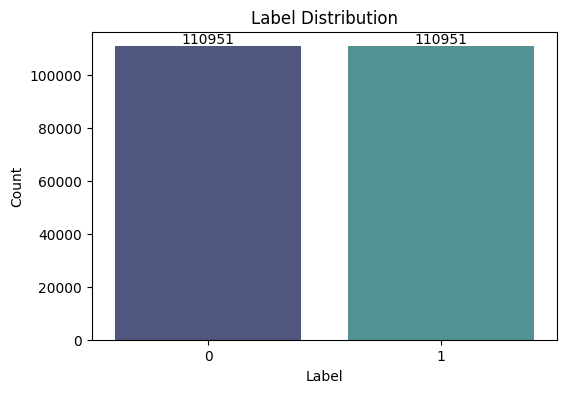

In [85]:
plt.figure(figsize=(6, 4))

# Create the countplot
ax = sns.countplot(x='label', data=df_fe_balanced, palette=[primary_color, secondary_color])

# Add title and labels
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.show()

In [86]:
df_fe_balanced.head(20)

gender       age  user_level  tenure_in_years   segment  this_month_arpu  \
0        0  0.253601    0.151795         1.038188  0.206844         0.192391   
1        1  0.925952    0.070243        -0.275232  0.146179        -0.746888   
2        0 -1.283199    0.070243        -0.275232  0.120251        -0.470541   
3        1 -0.226649    0.151795        -0.275232  0.206844        -0.788884   
4        0 -1.187149    0.151795        -0.275232  0.206844        -0.199444   
5        1  1.118052    0.032455        -0.275232  0.146179        -0.237690   
6        1  1.118052    0.151795        -0.275232  0.314981        -0.415234   
7        0 -0.610849    0.537112        -0.275232  0.314981         1.313526   
8        0  1.214102    0.070243        -0.275232  0.206844        -0.750638   
9        1 -1.763449    0.151795        -0.275232  0.120251        -0.580030   
10       1  0.349651    0.151795        -0.275232  0.206844        -0.300309   
11       1 -0.706899    0.151795        -0.275232  0.206844         0.934815   
12       0 -0.226649    0.151795        -0.275232  0.206844        -0.529410   
13       1  0.733852    0.151795        -0.275232  0.120251        -1.106851   
14       0  0.733852    0.537112        -0.275232  0.146179        -0.750638   
15       1 -1.667399    0.151795        -0.275232  0.206844        -0.747076   
16       0  1.118052    0.151795        -0.275232  0.206844         0.767957   
17       0 -1.187149    0.014809        -0.275232  0.146179        -1.106851   
18       1  1.406202    0.151795        -0.275232  0.146179        -0.713141   
19       0 -1.763449    0.151795        -0.275232  0.146179        -0.716891   

    last_month_arpu  the_month_before_last_arpu  this_month_dou  \
0          0.198692                    0.202208        1.242458   
1         -0.874343                   -0.897417       -0.705585   
2         -0.673536                   -0.785827        0.103094   
3         -0.824723                   -0.820699       -0.705592   
4         -0.208348                   -0.200755       -0.160978   
5         -0.402176                   -0.335787       -0.701942   
6         -0.484360                   -0.489804       -0.705589   
7          1.361662                    1.364602        1.684535   
8         -0.770451                   -0.747080       -0.705592   
9         -0.596005                   -0.566909       -0.705582   
10        -0.557239                   -0.549473       -0.268217   
11         1.011802                    1.021696       -0.705503   
12        -0.541151                   -0.249769        3.213247   
13        -1.138725                   -0.262750       -0.705592   
14        -0.770451                   -0.766454       -0.705592   
15        -0.699509                   -0.764516       -0.704910   
16         0.799560                    0.802778       -0.445937   
17        -1.138725                   -0.803263       -0.650825   
18        -0.731685                   -0.727707       -0.705592   
19        -0.641167                   -0.704459       -0.705592   

    last_month_dou  the_month_before_last_dou  this_month_mou  last_month_mou  \
0         0.869615                   0.567433       -0.130516       -0.080765   
1        -0.733998                  -0.705107       -0.213305       -0.347474   
2        -0.506814                  -0.257396       -0.699356       -0.576466   
3         0.747294                  -0.705114       -0.824875       -0.832399   
4         0.316481                   0.496782       -0.704697       -0.398661   
5        -0.733369                  -0.701388       -0.531108       -0.864727   
6        -0.733998                  -0.705096       10.247473        9.334860   
7         1.110976                   1.613713        3.546913        2.222628   
8        -0.734006                  -0.705114       -0.290753       -0.323228   
9         2.215962                   2.114155       -0.165234        1.904733   
10       -0.387437      

In [87]:
df_fe_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221902 entries, 0 to 221901
Data columns (total 52 columns):
 #   Column                                                             Non-Null Count   Dtype   
---  ------                                                             --------------   -----   
 0   gender                                                             221902 non-null  int64   
 1   age                                                                221902 non-null  float64 
 2   user_level                                                         221902 non-null  float64 
 3   tenure_in_years                                                    221902 non-null  float64 
 4   segment                                                            221902 non-null  float64 
 5   this_month_arpu                                                    221902 non-null  float64 
 6   last_month_arpu                                                    221902 non-null  float64 
 7   th

In [88]:
X = pd.get_dummies(df_fe_balanced, drop_first = True).drop(columns='label')
y = df_fe_balanced['label']

In [89]:
result_df = pd.DataFrame(columns=['Model Name', 'Accuracy', 'ROC AUC', 'Recall', 'Precision', 'F1 Score'])

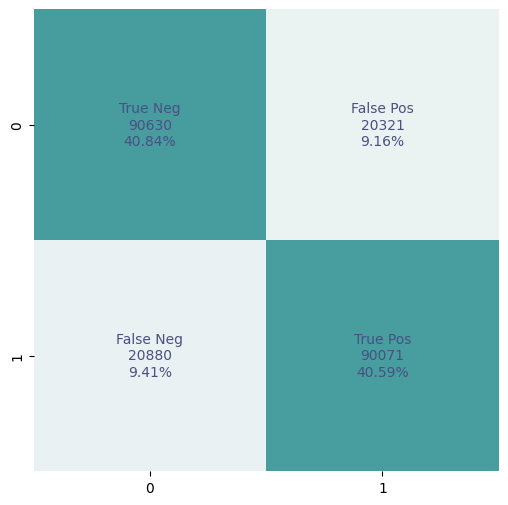

ROC_AUC_SCORE:  0.8143279465710088
              precision    recall  f1-score   support

           0       0.81      0.82      0.81    110951
           1       0.82      0.81      0.81    110951

    accuracy                           0.81    221902
   macro avg       0.81      0.81      0.81    221902
weighted avg       0.81      0.81      0.81    221902



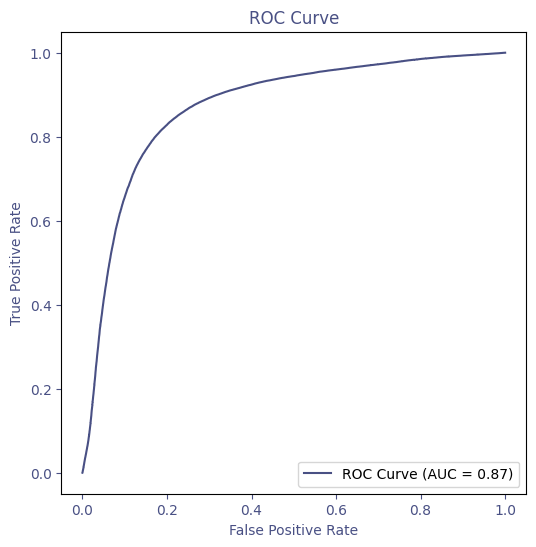

Total Model Training Time (Logistic Regression): 48s
           Model Name  Accuracy   ROC AUC    Recall  Precision  F1 Score
0  LogisticRegression  0.814328  0.872475  0.811809   0.815795  0.813404
                                              Feature  Coefficient
2                                          user_level     2.150799
4                                             segment     1.866482
48  is_low-consumption_number_retention_user_this_...    -1.052344
14               average_dou_in_the_past_three_months    -0.947984
45                                     is_home_user_1     0.705140
42                   is_terminal_contract_bundled_1.0    -0.675989
41             is_broadband_user_of_another_network_1    -0.674874
43                           is_credit_contracted_1.0    -0.599077
8                                      this_month_dou     0.528927
9                                      last_month_dou     0.492388
47                                    terminal_type_2    -0.4686

In [90]:
#Logistic Regression + coefficients. 

### Logistic Regression
start_time = time.time()
logit_classifier = LogisticRegression()
model_evaluation(logit_classifier, X, y)
result_df = append_model_results_to_table('LogisticRegression', logit_classifier, X, y, result_df)
print('Total Model Training Time (Logistic Regression): {}s'.format(math.ceil(time.time()-start_time)))
print(result_df)

# New code to get and rank coefficients
# Fit the model
logit_classifier.fit(X, y)

# Get the coefficients and feature names
coefficients = logit_classifier.coef_[0]
feature_names = X.columns

# Create a DataFrame for coefficients
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Rank the coefficients by their absolute values
coeff_df['Absolute Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the ranked coefficients
print(coeff_df[['Feature', 'Coefficient']])


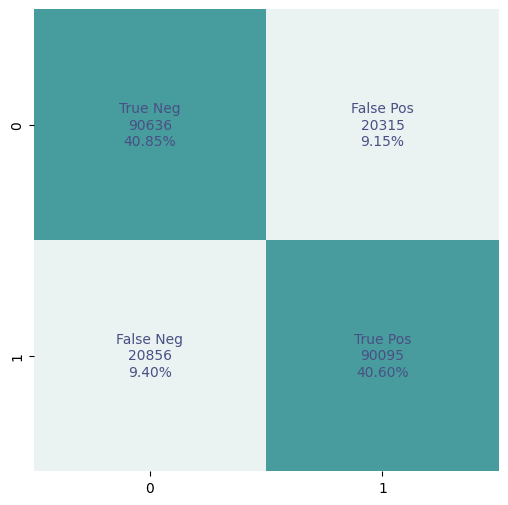

ROC_AUC_SCORE:  0.8144631413867383
              precision    recall  f1-score   support

           0       0.81      0.82      0.81    110951
           1       0.82      0.81      0.81    110951

    accuracy                           0.81    221902
   macro avg       0.81      0.81      0.81    221902
weighted avg       0.81      0.81      0.81    221902



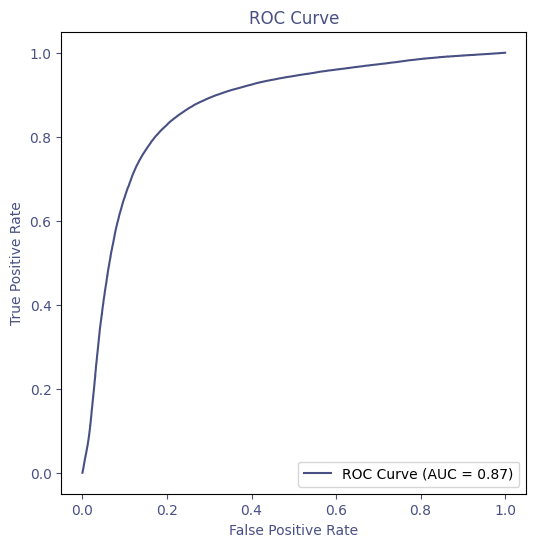

Total Model Training Time (L1 Logistic Regression with SAGA): 11145s
                      Model Name  Accuracy   ROC AUC    Recall  Precision  \
0             LogisticRegression  0.814328  0.872475  0.811809   0.815795   
1  L1 Logistic Regression (SAGA)  0.814463  0.872488  0.812025   0.815884   

   F1 Score  
0  0.813404  
1  0.813553  
                                              Feature   Coefficient
2                                          user_level  2.130446e+00
4                                             segment  1.895506e+00
48  is_low-consumption_number_retention_user_this_... -1.043282e+00
14               average_dou_in_the_past_three_months -8.544670e-01
45                                     is_home_user_1  7.098022e-01
42                   is_terminal_contract_bundled_1.0 -6.797181e-01
41             is_broadband_user_of_another_network_1 -6.603695e-01
43                           is_credit_contracted_1.0 -5.863058e-01
8                                      this_m

In [91]:
### L1 Logistic Regression (Lasso) with SAGA Solver redone to get coefficients. 
start_time = time.time()
logit_classifier = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
model_evaluation(logit_classifier, X, y)
result_df = append_model_results_to_table('L1 Logistic Regression (SAGA)', logit_classifier, X, y, result_df)
print('Total Model Training Time (L1 Logistic Regression with SAGA): {}s'.format(math.ceil(time.time()-start_time)))
print(result_df)

# New code to get and rank coefficients
# Fit the model
logit_classifier.fit(X, y)

# Get the coefficients and feature names
coefficients = logit_classifier.coef_[0]
feature_names = X.columns

# Create a DataFrame for coefficients
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Rank the coefficients by their absolute values
coeff_df['Absolute Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the ranked coefficients
print(coeff_df[['Feature', 'Coefficient']])


In [92]:
# Assuming coeff_df is already defined and sorted by 'Absolute Coefficient'
top_10_features = coeff_df.head(10)['Feature'].values

# Redefine X to include only the top 10 features
X_10 = X[top_10_features]

# y remains the same
y_10 = y

print("New X shape:", X_10.shape)
print("New y shape:", y_10.shape)


New X shape: (221902, 10)
New y shape: (221902,)


In [93]:
# Assuming coeff_df is already defined and sorted by 'Absolute Coefficient'
top_15_features = coeff_df.head(15)['Feature'].values

# Redefine X to include only the top 15 features
X_15 = X[top_15_features]

# y remains the same
y_15 = y

print("New X shape:", X_15.shape)
print("New y shape:", y_15.shape)


New X shape: (221902, 15)
New y shape: (221902,)


In [94]:
# Assuming coeff_df is already defined and sorted by 'Absolute Coefficient'
top_25_features = coeff_df.head(25)['Feature'].values

# Redefine X to include only the top 25 features
X_25 = X[top_25_features]

# y remains the same
y_25 = y

print("New X shape:", X_25.shape)
print("New y shape:", y_25.shape)


New X shape: (221902, 25)
New y shape: (221902,)


In [95]:
# Get the y-intercept
intercept = logit_classifier.intercept_[0]
print("Y-Intercept (Intercept Term):", intercept)

Y-Intercept (Intercept Term): -1.3452054733181853


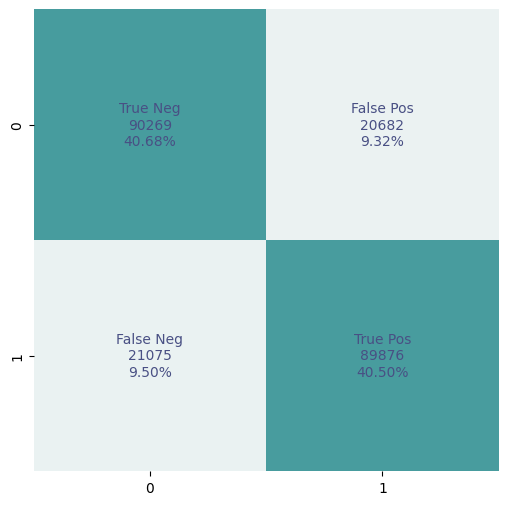

ROC_AUC_SCORE:  0.811822335986156
              precision    recall  f1-score   support

           0       0.81      0.81      0.81    110951
           1       0.81      0.81      0.81    110951

    accuracy                           0.81    221902
   macro avg       0.81      0.81      0.81    221902
weighted avg       0.81      0.81      0.81    221902



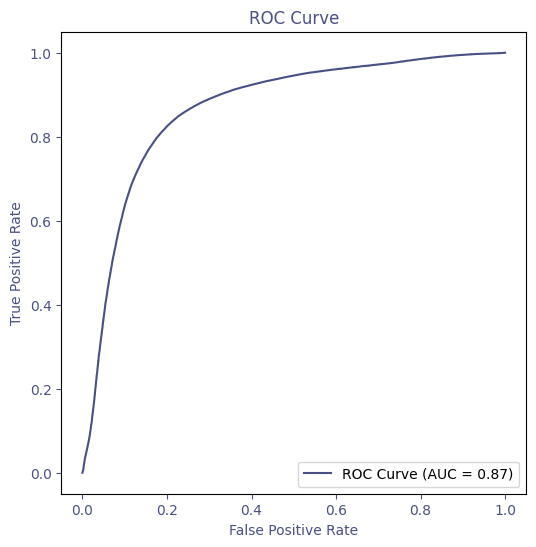

Total Model Training Time (L1 Logistic Regression with SAGA): 147s
                             Model Name  Accuracy   ROC AUC    Recall  \
0                    LogisticRegression  0.814328  0.872475  0.811809   
1         L1 Logistic Regression (SAGA)  0.814463  0.872488  0.812025   
2  Top_10 L1 Logistic Regression (SAGA)  0.811822  0.868171  0.810051   

   Precision  F1 Score  
0   0.815795  0.813404  
1   0.815884  0.813553  
2   0.812915  0.811378  
                                             Feature  Coefficient
0                                         user_level     2.497728
1                                            segment     1.583133
9                                    this_month_arpu     1.185825
2  is_low-consumption_number_retention_user_this_...    -1.111006
4                                     is_home_user_1     0.807733
6             is_broadband_user_of_another_network_1    -0.769268
5                   is_terminal_contract_bundled_1.0    -0.597650
7           

In [96]:
#Top 10 Coefficients recruited to create new lasso regression model = 81 accuracy 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Select top 10 features based on absolute coefficient values
top_10_features = coeff_df.nlargest(10, 'Absolute Coefficient')['Feature']

# Fit a logistic regression model using only the top 10 features
X_top_10 = X[top_10_features]
start_time = time.time()
logit_classifier = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
model_evaluation(logit_classifier, X_top_10, y)
result_df = append_model_results_to_table('Top_10 L1 Logistic Regression (SAGA)', logit_classifier, X_top_10, y, result_df)
print('Total Model Training Time (L1 Logistic Regression with SAGA): {}s'.format(math.ceil(time.time()-start_time)))
print(result_df)

# New code to get and rank coefficients
# Fit the model
logit_classifier.fit(X_top_10, y)

# Get the coefficients and feature names
coefficients = logit_classifier.coef_[0]
feature_names = X_top_10.columns

# Create a DataFrame for coefficients
coeff_df_top10 = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Rank the coefficients by their absolute values
coeff_df_top10['Absolute Coefficient'] = coeff_df_top10['Coefficient'].abs()
coeff_df_top10 = coeff_df_top10.sort_values(by='Absolute Coefficient', ascending=False)

# Display the ranked coefficients
print(coeff_df_top10[['Feature', 'Coefficient']])

In [97]:
coeff_df.head(20)

Feature  Coefficient  \
2                                          user_level     2.130446   
4                                             segment     1.895506   
48  is_low-consumption_number_retention_user_this_...    -1.043282   
14               average_dou_in_the_past_three_months    -0.854467   
45                                     is_home_user_1     0.709802   
42                   is_terminal_contract_bundled_1.0    -0.679718   
41             is_broadband_user_of_another_network_1    -0.660369   
43                           is_credit_contracted_1.0    -0.586306   
8                                      this_month_dou     0.509706   
5                                     this_month_arpu     0.490436   
47                                    terminal_type_2    -0.466733   
9                                      last_month_dou     0.442062   
10                          the_month_before_last_dou     0.413931   
51                       is_5G_covered_in_workplace_1    -0.408284   
49                     is_number_changed_this_month_1    -0.377714   
6                                     last_month_arpu     0.362830   
7                          the_month_before_last_arpu     0.311036   
50                       is_5G_covered_in_residence_1    -0.292111   
21                                  total_package_fee     0.280766   
46                                    terminal_type_1    -0.226702   

    Absolute Coefficient  
2               2.130446  
4               1.895506  
48              1.043282  
14              0.854467  
45              0.709802  
42              0.679718  
41              0.660369  
43              0.586306  
8               0.509706  
5               0.490436  
47              0.466733  
9               0.442062  
10              0.413931  
51              0.408284  
49              0.377714  
6               0.362830  
7               0.311036  
50              0.292111  
21              0.280766  
46              0.226702

In [98]:
coeff_df_top20 = coeff_df.head(20)

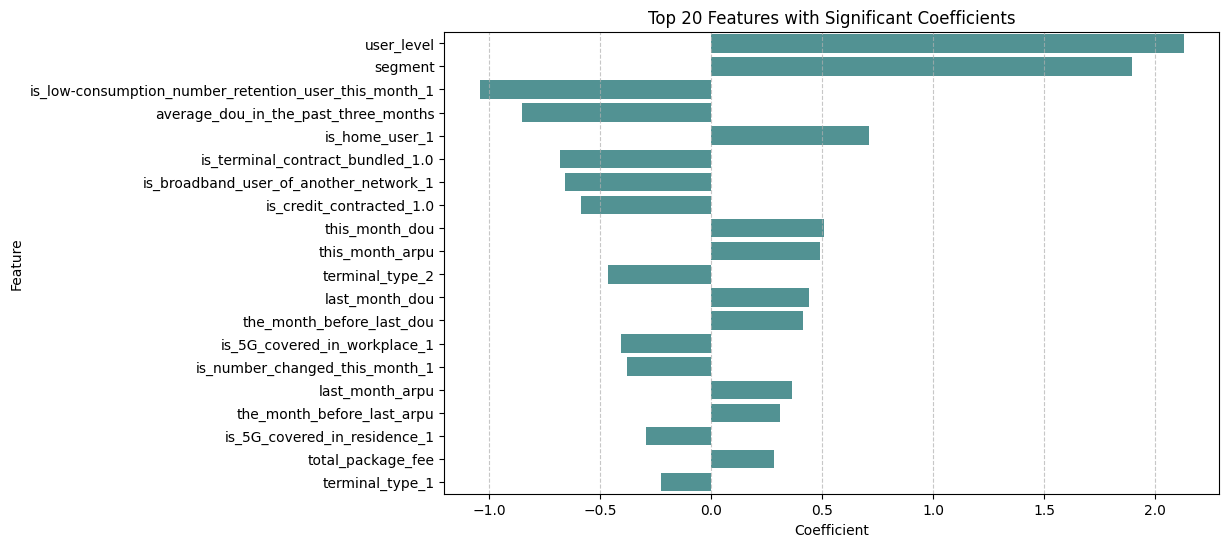

In [99]:
#All Features 
# Create bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df_top20, color='#479C9E')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Features with Significant Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [100]:
""" Top Features 
# Create bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df_top10, color='#479C9E')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Features with Significant Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
"""

" Top Features \n# Create bar chart using seaborn\nplt.figure(figsize=(10, 6))\nsns.barplot(x='Coefficient', y='Feature', data=coeff_df_top10, color='#479C9E')\nplt.xlabel('Coefficient')\nplt.ylabel('Feature')\nplt.title('Top 10 Features with Significant Coefficients')\nplt.grid(axis='x', linestyle='--', alpha=0.7)\n\n# Show the plot\nplt.show()\n"

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Select top 9 features based on absolute coefficient values
top_9_features = coeff_df.nlargest(9, 'Absolute Coefficient')['Feature']

# Fit a logistic regression model using only the top 9 features
X_top_9 = X[top_9_features]
reduced_model = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
reduced_model.fit(X_top_9, y)

# Evaluate the reduced model
y_pred = reduced_model.predict(X_top_9)
roc_auc = roc_auc_score(y, y_pred)
recall = recall_score(y, y_pred)
print("ROC AUC of Top9 coef Reduced Model:", roc_auc)
print("Recall of Top9 coef Reduced Model:", recall)

ROC AUC of Top9 coef Reduced Model: 0.7625618516281961
Recall of Top9 coef Reduced Model: 0.7281322385557588


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Select top 28 features based on absolute coefficient values
top_28_features = coeff_df.nlargest(28, 'Absolute Coefficient')['Feature']

# Fit a logistic regression model using only the top 28 features
X_top_28 = X[top_28_features]
reduced_model = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
reduced_model.fit(X_top_28, y)

# Evaluate the reduced model
y_pred = reduced_model.predict(X_top_28)
roc_auc = roc_auc_score(y, y_pred)
recall = recall_score(y, y_pred)
print("ROC AUC of Top28 coef Reduced Model:", roc_auc)
print("Recall of Top28 coef Reduced Model:", recall)

ROC AUC of Top28 coef Reduced Model: 0.8180322845219963
Recall of Top28 coef Reduced Model: 0.8209930509864715


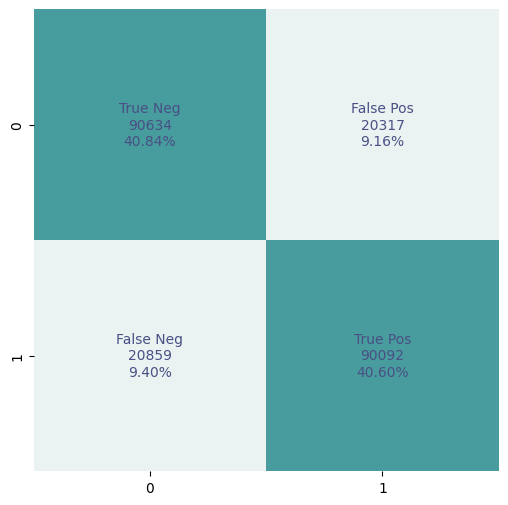

ROC_AUC_SCORE:  0.8144406089174501
              precision    recall  f1-score   support

           0       0.81      0.82      0.81    110951
           1       0.82      0.81      0.81    110951

    accuracy                           0.81    221902
   macro avg       0.81      0.81      0.81    221902
weighted avg       0.81      0.81      0.81    221902



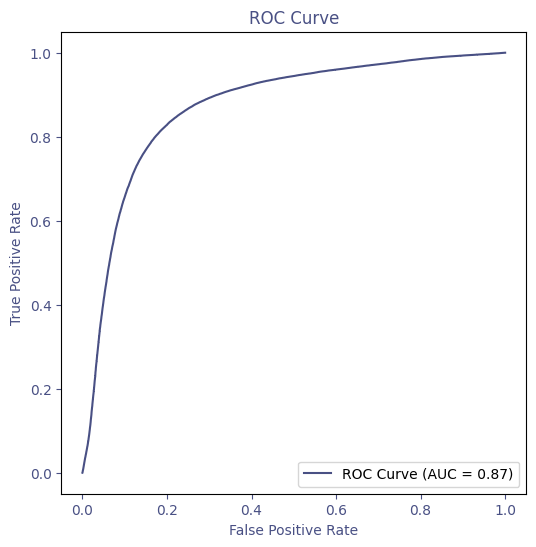

Total Model Training Time (L2 Logistic Regression with SAGA): 2856s
                             Model Name  Accuracy   ROC AUC    Recall  \
0                    LogisticRegression  0.814328  0.872475  0.811809   
1         L1 Logistic Regression (SAGA)  0.814463  0.872488  0.812025   
2  Top_10 L1 Logistic Regression (SAGA)  0.811822  0.868171  0.810051   
3         L2 Logistic Regression (SAGA)  0.814441  0.872491  0.811998   

   Precision  F1 Score  
0   0.815795  0.813404  
1   0.815884  0.813553  
2   0.812915  0.811378  
3   0.815864  0.813530  


In [103]:
### L2 Logistic Regression (Ridge) with SAGA Solver
start_time = time.time()
logit_classifier = LogisticRegression(penalty='l2', solver='saga', max_iter=1000)
model_evaluation(logit_classifier, X, y)
result_df = append_model_results_to_table('L2 Logistic Regression (SAGA)', logit_classifier, X, y, result_df)
print('Total Model Training Time (L2 Logistic Regression with SAGA): {}s'.format(math.ceil(time.time()-start_time)))
print(result_df)


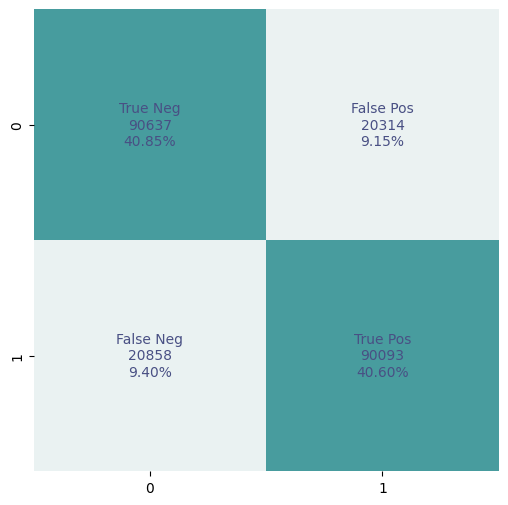

ROC_AUC_SCORE:  0.8144586348928806
              precision    recall  f1-score   support

           0       0.81      0.82      0.81    110951
           1       0.82      0.81      0.81    110951

    accuracy                           0.81    221902
   macro avg       0.81      0.81      0.81    221902
weighted avg       0.81      0.81      0.81    221902



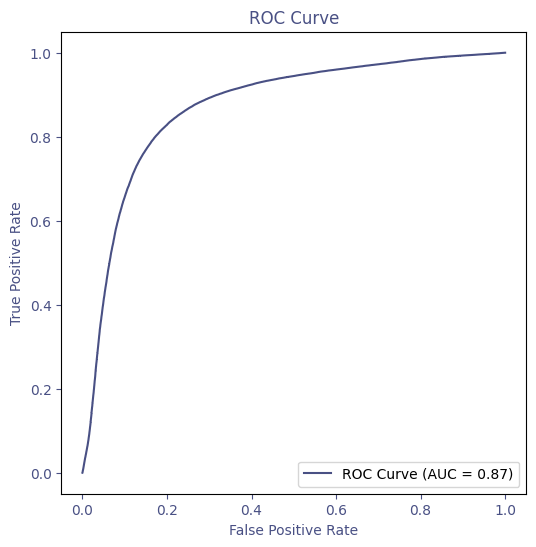

Total Model Training Time (Elastic Net Logistic Regression with SAGA): 3461s
                               Model Name  Accuracy   ROC AUC    Recall  \
0                      LogisticRegression  0.814328  0.872475  0.811809   
1           L1 Logistic Regression (SAGA)  0.814463  0.872488  0.812025   
2    Top_10 L1 Logistic Regression (SAGA)  0.811822  0.868171  0.810051   
3           L2 Logistic Regression (SAGA)  0.814441  0.872491  0.811998   
4  Elastic Net Logistic Regression (SAGA)  0.814459  0.872489  0.812007   

   Precision  F1 Score  
0   0.815795  0.813404  
1   0.815884  0.813553  
2   0.812915  0.811378  
3   0.815864  0.813530  
4   0.815889  0.813547  


In [104]:
### Elastic Net Logistic Regression with SAGA Solver
start_time = time.time()
logit_classifier = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
model_evaluation(logit_classifier, X, y)
result_df = append_model_results_to_table('Elastic Net Logistic Regression (SAGA)', logit_classifier, X, y, result_df)
print('Total Model Training Time (Elastic Net Logistic Regression with SAGA): {}s'.format(math.ceil(time.time()-start_time)))
print(result_df)


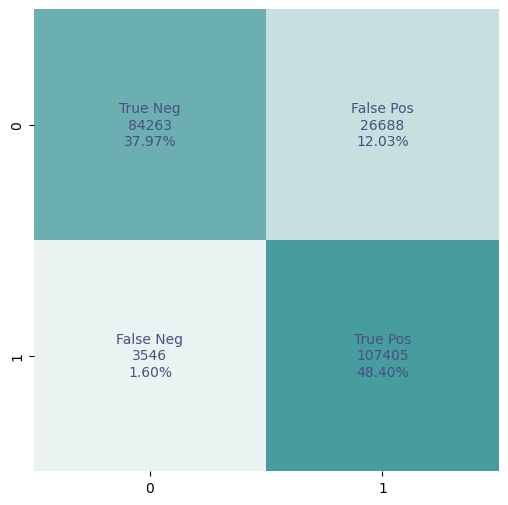

ROC_AUC_SCORE:  0.8637506647078438
              precision    recall  f1-score   support

           0       0.96      0.76      0.85    110951
           1       0.80      0.97      0.88    110951

    accuracy                           0.86    221902
   macro avg       0.88      0.86      0.86    221902
weighted avg       0.88      0.86      0.86    221902



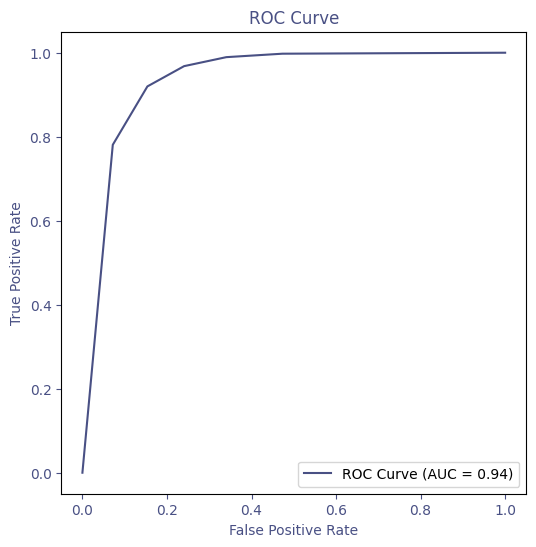

Total Model Training Time (KNN): 419s
                               Model Name  Accuracy   ROC AUC    Recall  \
0                      LogisticRegression  0.814328  0.872475  0.811809   
1           L1 Logistic Regression (SAGA)  0.814463  0.872488  0.812025   
2    Top_10 L1 Logistic Regression (SAGA)  0.811822  0.868171  0.810051   
3           L2 Logistic Regression (SAGA)  0.814441  0.872491  0.811998   
4  Elastic Net Logistic Regression (SAGA)  0.814459  0.872489  0.812007   
5                    KNeighborsClassifier  0.863751  0.935483  0.968040   

   Precision  F1 Score  
0   0.815795  0.813404  
1   0.815884  0.813553  
2   0.812915  0.811378  
3   0.815864  0.813530  
4   0.815889  0.813547  
5   0.800966  0.876600  


In [105]:
### K-Nearest Neighbors (KNN)
start_time = time.time()
knn_classifier = KNeighborsClassifier()
model_evaluation(knn_classifier, X, y)
result_df = append_model_results_to_table('KNeighborsClassifier', knn_classifier, X, y, result_df)
print('Total Model Training Time (KNN): {}s'.format(math.ceil(time.time()-start_time)))


# Print the updated results table
print(result_df)

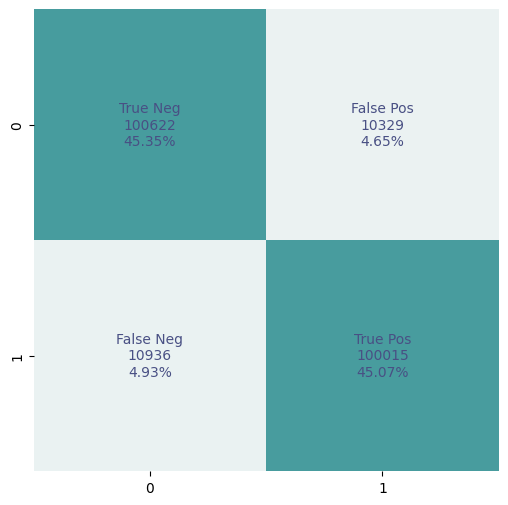

ROC_AUC_SCORE:  0.9041694081170968
              precision    recall  f1-score   support

           0       0.90      0.91      0.90    110951
           1       0.91      0.90      0.90    110951

    accuracy                           0.90    221902
   macro avg       0.90      0.90      0.90    221902
weighted avg       0.90      0.90      0.90    221902



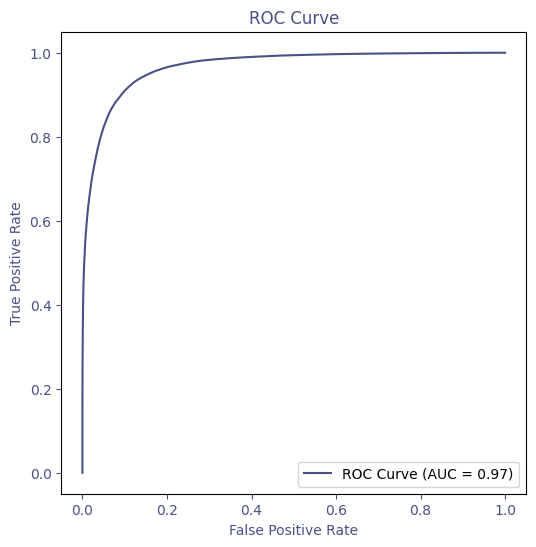

Total Model Training Time (Random Forest): 3559s
                               Model Name  Accuracy   ROC AUC    Recall  \
0                      LogisticRegression  0.814328  0.872475  0.811809   
1           L1 Logistic Regression (SAGA)  0.814463  0.872488  0.812025   
2    Top_10 L1 Logistic Regression (SAGA)  0.811822  0.868171  0.810051   
3           L2 Logistic Regression (SAGA)  0.814441  0.872491  0.811998   
4  Elastic Net Logistic Regression (SAGA)  0.814459  0.872489  0.812007   
5                    KNeighborsClassifier  0.863751  0.935483  0.968040   
6                  RandomForestClassifier  0.904170  0.970529  0.901434   

   Precision  F1 Score  
0   0.815795  0.813404  
1   0.815884  0.813553  
2   0.812915  0.811378  
3   0.815864  0.813530  
4   0.815889  0.813547  
5   0.800966  0.876600  
6   0.906998  0.899841  


In [106]:
### Random Forest
start_time = time.time()
rf_classifier = RandomForestClassifier(random_state=42)
model_evaluation(rf_classifier, X, y)
result_df = append_model_results_to_table('RandomForestClassifier', rf_classifier, X, y, result_df)
print('Total Model Training Time (Random Forest): {}s'.format(math.ceil(time.time()-start_time)))
# Print the updated results table
print(result_df)

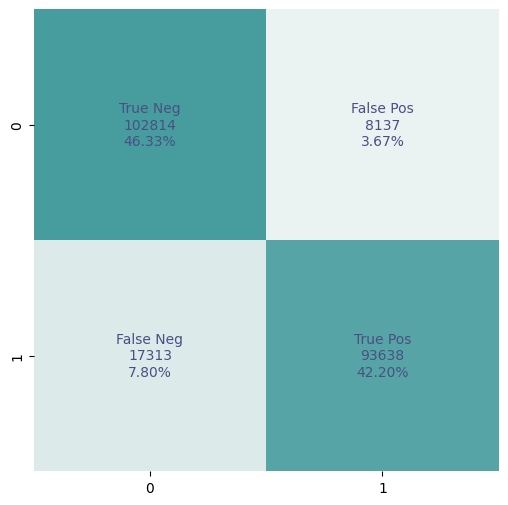

ROC_AUC_SCORE:  0.8853097313228364
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    110951
           1       0.92      0.84      0.88    110951

    accuracy                           0.89    221902
   macro avg       0.89      0.89      0.89    221902
weighted avg       0.89      0.89      0.89    221902



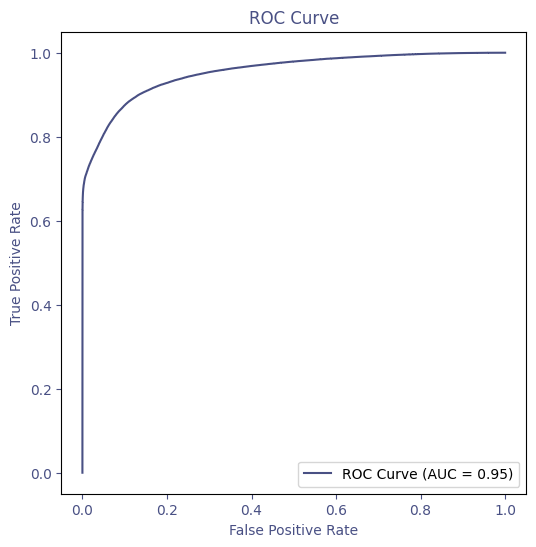

Total Model Training Time (XGBoost): 66s
                               Model Name  Accuracy   ROC AUC    Recall  \
0                      LogisticRegression  0.814328  0.872475  0.811809   
1           L1 Logistic Regression (SAGA)  0.814463  0.872488  0.812025   
2    Top_10 L1 Logistic Regression (SAGA)  0.811822  0.868171  0.810051   
3           L2 Logistic Regression (SAGA)  0.814441  0.872491  0.811998   
4  Elastic Net Logistic Regression (SAGA)  0.814459  0.872489  0.812007   
5                    KNeighborsClassifier  0.863751  0.935483  0.968040   
6                  RandomForestClassifier  0.904170  0.970529  0.901434   
7                                 XGBoost  0.885311  0.968482  0.843958   

   Precision  F1 Score  
0   0.815795  0.813404  
1   0.815884  0.813553  
2   0.812915  0.811378  
3   0.815864  0.813530  
4   0.815889  0.813547  
5   0.800966  0.876600  
6   0.906998  0.899841  
7   0.920933  0.859638  


In [107]:
### XGBoost
start_time = time.time()
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_evaluation(xgb_classifier, X, y)
result_df = append_model_results_to_table('XGBoost', xgb_classifier, X, y, result_df)
print('Total Model Training Time (XGBoost): {}s'.format(math.ceil(time.time()-start_time)))

# Print the results for all models
print(result_df)

In [108]:
"""
BELOW THIS WE DO BRUCE MODELS WITH TOP 10 FEATURES ONLY 
print("New X shape:", X_10.shape)
print("New y shape:", y_10.shape)
print("New X shape:", X_10.shape)
print("New y shape:", y_10.shape)
print("New X shape:", X_10.shape)
print("New y shape:", y_10.shape)
print("New X shape:", X_10.shape)
print("New y shape:", y_10.shape)
print("New X shape:", X_10.shape)
print("New y shape:", y_10.shape)
print("New X shape:", X_10.shape)
print("New y shape:", y_10.shape)
print("New X shape:", X_10.shape)
print("New y shape:", y_10.shape)
print("New X shape:", X_10.shape)
print("New y shape:", y_10.shape)
print("New X shape:", X_10.shape)
print("New y shape:", y_10.shape)



"""

'\nBELOW THIS WE DO BRUCE MODELS WITH TOP 10 FEATURES ONLY \nprint("New X shape:", X_10.shape)\nprint("New y shape:", y_10.shape)\nprint("New X shape:", X_10.shape)\nprint("New y shape:", y_10.shape)\nprint("New X shape:", X_10.shape)\nprint("New y shape:", y_10.shape)\nprint("New X shape:", X_10.shape)\nprint("New y shape:", y_10.shape)\nprint("New X shape:", X_10.shape)\nprint("New y shape:", y_10.shape)\nprint("New X shape:", X_10.shape)\nprint("New y shape:", y_10.shape)\nprint("New X shape:", X_10.shape)\nprint("New y shape:", y_10.shape)\nprint("New X shape:", X_10.shape)\nprint("New y shape:", y_10.shape)\nprint("New X shape:", X_10.shape)\nprint("New y shape:", y_10.shape)\n\n\n\n'

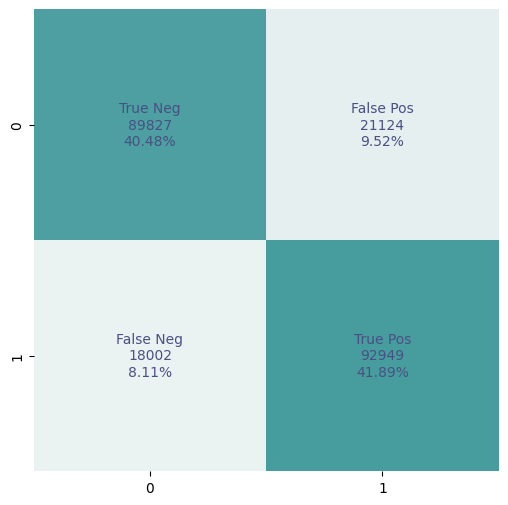

ROC_AUC_SCORE:  0.8236789213256303
              precision    recall  f1-score   support

           0       0.83      0.81      0.82    110951
           1       0.81      0.84      0.83    110951

    accuracy                           0.82    221902
   macro avg       0.82      0.82      0.82    221902
weighted avg       0.82      0.82      0.82    221902



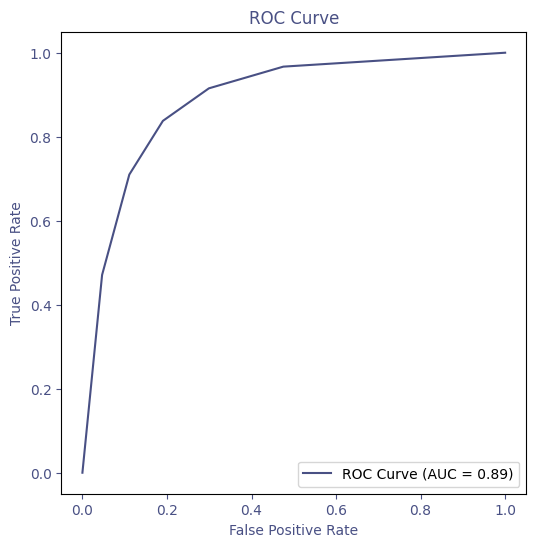

Total Model Training Time (KNN): 395s
                               Model Name  Accuracy   ROC AUC    Recall  \
0                      LogisticRegression  0.814328  0.872475  0.811809   
1           L1 Logistic Regression (SAGA)  0.814463  0.872488  0.812025   
2    Top_10 L1 Logistic Regression (SAGA)  0.811822  0.868171  0.810051   
3           L2 Logistic Regression (SAGA)  0.814441  0.872491  0.811998   
4  Elastic Net Logistic Regression (SAGA)  0.814459  0.872489  0.812007   
5                    KNeighborsClassifier  0.863751  0.935483  0.968040   
6                  RandomForestClassifier  0.904170  0.970529  0.901434   
7                                 XGBoost  0.885311  0.968482  0.843958   
8                    KNeighborsClassifier  0.823679  0.887812  0.837748   

   Precision  F1 Score  
0   0.815795  0.813404  
1   0.815884  0.813553  
2   0.812915  0.811378  
3   0.815864  0.813530  
4   0.815889  0.813547  
5   0.800966  0.876600  
6   0.906998  0.899841  
7   0.92093

In [109]:
### K-Nearest Neighbors (KNN) - Top 10
start_time = time.time()
knn_classifier = KNeighborsClassifier()
model_evaluation(knn_classifier, X_10, y_10)
result_df = append_model_results_to_table('KNeighborsClassifier', knn_classifier, X_10, y_10, result_df)
print('Total Model Training Time (KNN): {}s'.format(math.ceil(time.time()-start_time)))


# Print the updated results table
print(result_df)

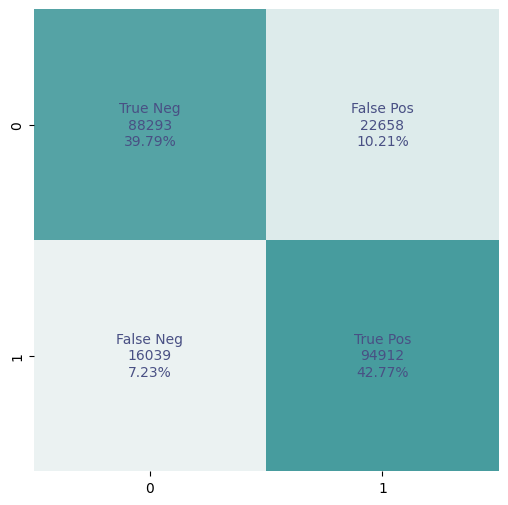

ROC_AUC_SCORE:  0.8256122071905616
              precision    recall  f1-score   support

           0       0.85      0.80      0.82    110951
           1       0.81      0.86      0.83    110951

    accuracy                           0.83    221902
   macro avg       0.83      0.83      0.83    221902
weighted avg       0.83      0.83      0.83    221902



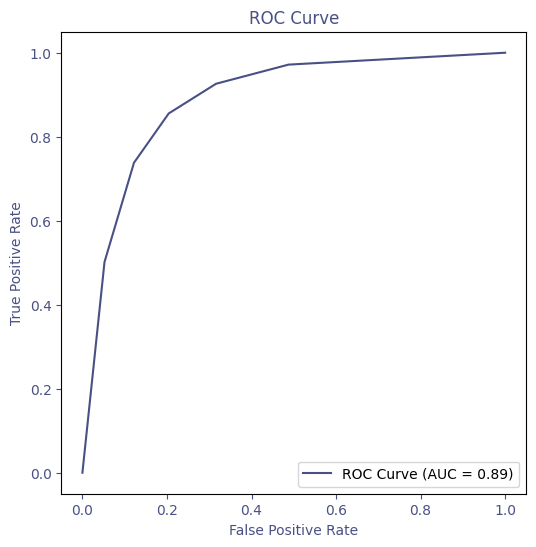

Total Model Training Time (KNN): 514s
                               Model Name  Accuracy   ROC AUC    Recall  \
0                      LogisticRegression  0.814328  0.872475  0.811809   
1           L1 Logistic Regression (SAGA)  0.814463  0.872488  0.812025   
2    Top_10 L1 Logistic Regression (SAGA)  0.811822  0.868171  0.810051   
3           L2 Logistic Regression (SAGA)  0.814441  0.872491  0.811998   
4  Elastic Net Logistic Regression (SAGA)  0.814459  0.872489  0.812007   
5                    KNeighborsClassifier  0.863751  0.935483  0.968040   
6                  RandomForestClassifier  0.904170  0.970529  0.901434   
7                                 XGBoost  0.885311  0.968482  0.843958   
8                    KNeighborsClassifier  0.823679  0.887812  0.837748   
9                    KNeighborsClassifier  0.825612  0.889640  0.855441   

   Precision  F1 Score  
0   0.815795  0.813404  
1   0.815884  0.813553  
2   0.812915  0.811378  
3   0.815864  0.813530  
4   0.81588

In [110]:
### K-Nearest Neighbors (KNN) - Top 15
start_time = time.time()
knn_classifier = KNeighborsClassifier()
model_evaluation(knn_classifier, X_15, y_15)
result_df = append_model_results_to_table('KNeighborsClassifier', knn_classifier, X_15, y_15, result_df)
print('Total Model Training Time (KNN): {}s'.format(math.ceil(time.time()-start_time)))


# Print the updated results table
print(result_df)

In [111]:
### K-Nearest Neighbors (KNN) - Top 25
start_time = time.time()
knn_classifier = KNeighborsClassifier()
model_evaluation(knn_classifier, X_25, y_25)
result_df = append_model_results_to_table('KNeighborsClassifier', knn_classifier, X_25, y_25, result_df)
print('Total Model Training Time (KNN): {}s'.format(math.ceil(time.time()-start_time)))


# Print the updated results table
print(result_df)

KeyboardInterrupt: 

In [ ]:
### Random Forest
start_time = time.time()
rf_classifier = RandomForestClassifier(random_state=42)
model_evaluation(rf_classifier, X_25, y_25)
result_df = append_model_results_to_table('RandomForestClassifier', rf_classifier, X_25, y_25, result_df)
print('Total Model Training Time (Random Forest): {}s'.format(math.ceil(time.time()-start_time)))
# Print the updated results table
print(result_df)

In [113]:
result_df.head(15)

Model Name  Accuracy   ROC AUC    Recall  \
0                      LogisticRegression  0.814328  0.872475  0.811809   
1           L1 Logistic Regression (SAGA)  0.814463  0.872488  0.812025   
2    Top_10 L1 Logistic Regression (SAGA)  0.811822  0.868171  0.810051   
3           L2 Logistic Regression (SAGA)  0.814441  0.872491  0.811998   
4  Elastic Net Logistic Regression (SAGA)  0.814459  0.872489  0.812007   
5                    KNeighborsClassifier  0.863751  0.935483  0.968040   
6                  RandomForestClassifier  0.904170  0.970529  0.901434   
7                                 XGBoost  0.885311  0.968482  0.843958   
8                    KNeighborsClassifier  0.823679  0.887812  0.837748   
9                    KNeighborsClassifier  0.825612  0.889640  0.855441   

   Precision  F1 Score  
0   0.815795  0.813404  
1   0.815884  0.813553  
2   0.812915  0.811378  
3   0.815864  0.813530  
4   0.815889  0.813547  
5   0.800966  0.876600  
6   0.906998  0.899841  
7   0.920933  0.859638  
8   0.814760  0.825820  
9   0.807198  0.830364

In [ ]:
# result_df.to_csv("result_df")

In [ ]:
# result_df_nonsmote.to_csv("result_df_nonsmote")

In [ ]:
result_df1 = result_df
result_df_nonsmote1 = result_df_nonsmote

In [ ]:
# Deleting rows 2, 3, 4 (index 1, 2, 3 in zero-indexed format)
result_df1 = result_df1.drop([1, 2, 3]).reset_index(drop=True)
result_df1

In [ ]:
# Visualization function with side-by-side bars and data labels
def visualize_model_results_with_labels(df):
    metrics = ['Accuracy', 'ROC AUC', 'Recall', 'Precision', 'F1 Score']
    num_metrics = len(metrics)
    bar_width = 0.15  # Width of the bars
    
    # Colors
    primary_color = "#495084"  # Base primary color
    secondary_color = "#479C9E"  # Base secondary color
    lighter_primary = "#666EA5"  # Lighter version of primary color
    darker_primary = "#323766"  # Darker version of primary color
    lighter_secondary = "#6BBABC"  # Lighter version of secondary color
    darker_secondary = "#36787A"  # Darker version of secondary color

    colors = [primary_color, lighter_primary, secondary_color, lighter_secondary, darker_secondary]
    
    # Create positions for each model and the bars for each metric
    positions = range(len(df))
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, metric in enumerate(metrics):
        # Plot each metric side by side with different colors
        bar_positions = [p + i * bar_width for p in positions]
        ax.bar(bar_positions, df[metric], width=bar_width, label=metric, color=colors[i])
        
        # Add data labels to each bar
        for pos, value in zip(bar_positions, df[metric]):
            ax.text(pos, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

    # Customize the plot
    ax.set_title("Model Performance Comparison", fontsize=16, color=primary_color)
    ax.set_ylabel("Score", fontsize=12, color=primary_color)
    ax.set_xlabel("Model", fontsize=12, color=primary_color)
    ax.set_xticks([p + bar_width * (num_metrics / 2) - bar_width / 2 for p in positions])
    ax.set_xticklabels(df['Model Name'], fontsize=10)
    
    # Add grid, legend, and tighten layout
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
    ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()

    # Show the plot
    plt.show()

# Visualize the model comparison results with labels and side-by-side bars
visualize_model_results_with_labels(result_df1)

In [ ]:
result_df1